
# **Projeto 01 - Análise Exploratória dos Dados do Enade com Python**

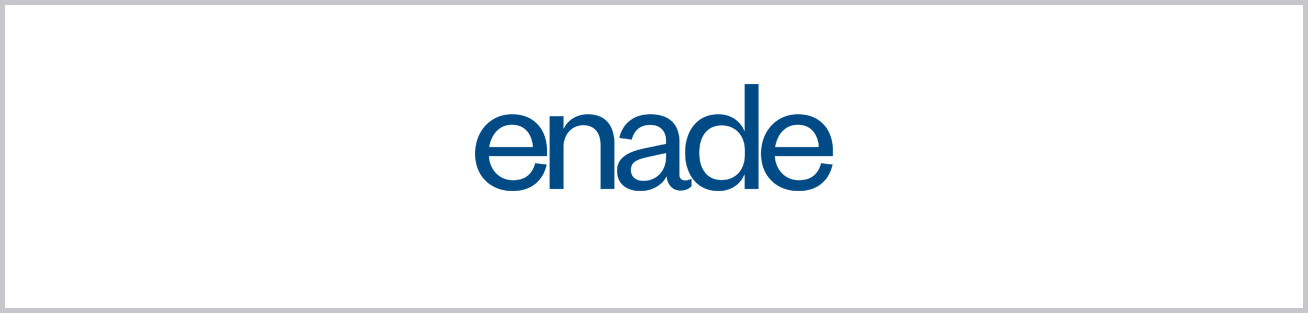

---
<p align="justify">
Esse trabalho foi realizado por Emerson Lima como parte do Trabalho de Conclusão de Curso da graduação em Ciência da Computação na UESB. Além disso, esse trabalho é o primeiro de uma série de projetos de Ciência de Dados e outros assuntos relacionados. 

<p align="justify">
Objetivo: O presente trabalho tem como objetivo realizar uma análise exploratória dos dados do Enade de 2011, 2014 e 2017, utilizando a linguagem de programação Python, com o intuito de descobrir as características dos concluintes dos cursos presenciais de computação da cidade de Vitória da Conquista - BA.

Este projeto foi dividido em três partes:


*   Processamento dos dados
*   Tratamento dos dados
*   Visualização dos resultados

# **Breve Introdução**

<p align="justify">
O Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial (INEP, 2022).
<p align="justify">
Os resultados de cursos, instituições de educação superior e áreas de 
avaliação são disponibilizados para consulta pública no Diário Oficial da União, no Sistema Enade, no Sistema e-MEC e no portal do Inep, na forma de conceitos, relatórios, microdados e sinopses estatísticas. Os microdados do Enade são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem à demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o Questionário do Estudante (INEP, 2022).

</p>




### **Processamento dos dados**

---

<p align="justify">

Descrição: nesta etapa é realizada a importação das bibliotecas que serão utilizadas durante a análise. Além disso, é feito a importação das bases de dados (microdados) do Enade 2011, 2014 e 2017.
</p>




####  **Importando as bibliotecas necessárias para a análise**

A biblioteca **Pandas** foi utilizada para auxiliar na manipulação e processamento dos datasets. A **Seaborn** e a **Matplotlib** foram utilizadas para gerar os gráficos e as visualizações. A biblioteca **Numpy** foi utilizada para realizar operações matemáticas.

In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


#### **Importando as base de dados**

As bases de dados estão armazenadas na minha conta do Google Drive com o link público, então qualquer pessoa pode utilizar os links abaixo para baixar tais bases de dados.

In [3]:
! gdown --id 1FclF-C_APDOg890A2q00MAtK_NHl7hOw
! gdown --id 157OEyB3H3tfB028SAP7D2yQqlDMFTHcr
! gdown --id 1aO9ZJrbrcRwNOBlnmZ0inqCVn29AEkj2

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FclF-C_APDOg890A2q00MAtK_NHl7hOw
To: /content/microdados_enade_2011.txt
100% 156M/156M [00:01<00:00, 106MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=157OEyB3H3tfB028SAP7D2yQqlDMFTHcr
To: /content/microdados_enade_2014.txt
100% 320M/320M [00:02<00:00, 137MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://

#### **Criando DataFrames com as bases de dados**

##### Obs: Cada DataFrame corresponde a uma edição do Enade

In [4]:
df_2011 = pd.read_table("/content/microdados_enade_2011.txt")
df_2014 = pd.read_csv("/content/microdados_enade_2014.txt", sep=";")
df_2017 = pd.read_table("/content/MICRODADOS_ENADE_2017.txt", delimiter=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (143,144,145,146,147,148,149,150,151,152,153,154,155) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,31,32,44,45,46,47,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# número de linhas e colunas em cada dataframe
print("2011:", df_2011.shape)
print("2014:", df_2014.shape)
print("2017:", df_2017.shape)

2011: (376180, 127)
2014: (481720, 156)
2017: (537436, 150)


<p align="justify">

#### Uma vez estabelecidos os DataFrames com as bases de dados, é preciso agora realizar filtros nesses dados para que no final tenha apenas os dados dos concluintes dos cursos presenciais de computação da cidade de Vitória da Conquista - BA.

</p>

#### **Filtro 1 (Selecionar as colunas que serão utéis para realização da análise)**

In [6]:
# selecionando as colunas que serão utilizadas nas análises
df1_2011 = df_2011[['nu_idade','tp_sexo','co_grupo','CO_MUNIC_CURSO','tp_pres','nt_fg','nt_ce','nt_ger','co_rs_s2','co_rs_s5', 'co_rs_s7', 'co_rs_s13','co_rs_s14','co_rs_s17','co_rs_s20']]
df1_2014 = df_2014[['nu_idade','tp_sexo','co_grupo','co_munic_curso','tp_pres','nt_fg','nt_ce','nt_ger','qe_i2','qe_i8','qe_i10','qe_i4','qe_i5','qe_i17','qe_i23','qe_i25']]
df1_2017 = df_2017[['NU_IDADE','TP_SEXO','CO_GRUPO','CO_MUNIC_CURSO','TP_PRES','NT_FG','NT_CE','NT_GER','QE_I02','QE_I08','QE_I10','QE_I04','QE_I05','QE_I17','QE_I23','QE_I25']]

In [7]:
# número de linhas e colunas em cada dataframe
print("2011:", df1_2011.shape)
print("2014:", df1_2014.shape)
print("2017:", df1_2017.shape)

2011: (376180, 15)
2014: (481720, 16)
2017: (537436, 16)


#### **Filtro 2 (Padronizar os nomes das colunas)**

In [8]:
# renomeando as colunas para deixar tudo padronizado
df1_2011.columns = ['idade', 'sexo', 'grupo', 'municipio', 'presenca', 'nota_formacao_geral', 'nota_comp_especifico', 'nota_bruta_geral', 'qe_i2','qe_i8','qe_i10','qe_i4','qe_i5','qe_i17','qe_i23']
df1_2014.columns = ['idade', 'sexo', 'grupo', 'municipio', 'presenca', 'nota_formacao_geral', 'nota_comp_especifico', 'nota_bruta_geral', 'qe_i2','qe_i8','qe_i10','qe_i4','qe_i5','qe_i17','qe_i23','qe_i25']
df1_2017.columns = ['idade', 'sexo', 'grupo', 'municipio', 'presenca', 'nota_formacao_geral', 'nota_comp_especifico', 'nota_bruta_geral', 'qe_i2','qe_i8','qe_i10','qe_i4','qe_i5','qe_i17','qe_i23','qe_i25']

In [9]:
# número de linhas e colunas em cada dataframe
print("2011:", df1_2011.shape)
print("2014:", df1_2014.shape)
print("2017:", df1_2017.shape)

2011: (376180, 15)
2014: (481720, 16)
2017: (537436, 16)


#### **Filtro 3 (Selecionando todos os alunos dos cursos de computação inscritos no Enade)**





In [10]:
# selecionando apenas os alunos dos cursos de computação inscritos no Enade
df2_2011 = df1_2011[(df1_2011["grupo"]==72) | (df1_2011["grupo"]==79) | (df1_2011["grupo"]==4004) | (df1_2011["grupo"]==4005) | (df1_2011["grupo"]==4006) | (df1_2011["grupo"]==4007)]
df2_2014 = df1_2014[(df1_2014["grupo"]==72) | (df1_2014["grupo"]==79) | (df1_2014["grupo"]==4004) | (df1_2014["grupo"]==4005) | (df1_2014["grupo"]==4006) | (df1_2014["grupo"]==5809)]
df2_2017 = df1_2017[(df1_2014["grupo"]==72) | (df1_2017["grupo"]==79) | (df1_2017["grupo"]==4003) | (df1_2017["grupo"]==4004) | (df1_2017["grupo"]==4005) | (df1_2017["grupo"]==4006) | (df1_2017["grupo"]==6409)]

In [11]:
# Número de alunos de computação inscritos em cada exame Enade
insComp2011 = df2_2011.shape[0]
insComp2014 = df2_2014.shape[0]
insComp2017 = df2_2017.shape[0]

print("Alunos de Computação inscritos em 2011:", insComp2011)
print("Alunos de Computação inscritos em 2014:", insComp2014)
print("Alunos de Computação inscritos em 2017:", insComp2017)

Alunos de Computação inscritos em 2011: 42739
Alunos de Computação inscritos em 2014: 51776
Alunos de Computação inscritos em 2017: 52147


#### **Filtro 4 (Selecionando todos os alunos dos cursos de computação de Vitória da Conquista - BA inscritos no Enade)**

In [12]:
# selecionando apenas os alunos dos cursos de computacao de Vitória da Conquista inscritos no Enade
df3_2011 = df2_2011[(df2_2011["municipio"]==2933307)]
df3_2014 = df2_2014[(df2_2014["municipio"]==2933307)]
df3_2017 = df2_2017[(df2_2017["municipio"]==2933307)]

In [13]:
# Número de alunos de computação de Vitória da Conquista inscritos em cada exame Enade
insCompVca2011 = df3_2011.shape[0]
insCompVca2014 = df3_2014.shape[0]
insCompVca2017 = df3_2017.shape[0]

print("Alunos de Computação inscritos em 2011:", insCompVca2011)
print("Alunos de Computação inscritos em 2014:", insCompVca2014)
print("Alunos de Computação inscritos em 2017:", insCompVca2017)

Alunos de Computação inscritos em 2011: 81
Alunos de Computação inscritos em 2014: 99
Alunos de Computação inscritos em 2017: 124


#### **Filtro 5 (Selecionando todos os alunos dos cursos de computação de Vitória da Conquista - BA presentes no Enade)**

In [14]:
# selecionando apenas os alunos que estavam presente durante o exame Enade
df4_2011 = df3_2011[(df3_2011["presenca"]==555)]
df4_2014 = df3_2014[(df3_2014["presenca"]==555)]
df4_2017 = df3_2017[(df3_2017["presenca"]==555)]

In [15]:
# Número de alunos de computação de Vitória da Conquista presentes em cada exame Enade
presComp2011 = df4_2011.shape[0]
presComp2014 = df4_2014.shape[0]
presComp2017 = df4_2017.shape[0]

print("Alunos de Computação presentes em 2011:", presComp2011)
print("Alunos de Computação presentes em 2014:", presComp2014)
print("Alunos de Computação presentes em 2017:", presComp2017)

Alunos de Computação presentes em 2011: 58
Alunos de Computação presentes em 2014: 81
Alunos de Computação presentes em 2017: 113


<p align="justify">
Uma vez feito o Processamento dos dados, tem como resultado três DataFrames contendo apenas os alunos dos cursos presenciais de computação de Vitória da Conquista - BA presentes nos Enades 2011, 2014 e 2017. A próxima etapa é da de Tratamento dos dados.
</p>

### **Tratamento dos dados**

---

<p align="justify">

Descrição: nesta etapa é feita uma verificação nos DataFrames gerados na etapa anterior em busca de valores nulos ou duplicados. Além disso, é definido funções que serão utéis na próxima etapa.
</p>

####  **Verificação de valores nulos**

In [16]:
# Verificando se há ocorrência de valores nulos nas bases de dados
df4_2011.isnull().sum()
df4_2014.isnull().sum()
df4_2017.isnull().sum()

idade                   0
sexo                    0
grupo                   0
municipio               0
presenca                0
nota_formacao_geral     0
nota_comp_especifico    0
nota_bruta_geral        0
qe_i2                   0
qe_i8                   0
qe_i10                  0
qe_i4                   0
qe_i5                   0
qe_i17                  0
qe_i23                  0
qe_i25                  0
dtype: int64

####  **Verificação de linhas duplicadas**

In [17]:
# Verificando se há ocorrência de valores duplicados nas bases de dados
print("Quantidade de linhas duplicadas do DataFrame do Enade 2011:", df4_2011.duplicated().sum())
print("Quantidade de linhas duplicadas do DataFrame do Enade 2014:", df4_2014.duplicated().sum())
print("Quantidade de linhas duplicadas do DataFrame do Enade 2017:", df4_2017.duplicated().sum())

Quantidade de linhas duplicadas do DataFrame do Enade 2011: 0
Quantidade de linhas duplicadas do DataFrame do Enade 2014: 0
Quantidade de linhas duplicadas do DataFrame do Enade 2017: 0


#### **Função para colocar valores e porcentagem nos gráficos de setores**

In [18]:
def colocar_valor_porcentagem(dataframe):
  def meu_autopct(pct):
    total = sum(dataframe)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
  return meu_autopct

#### **Função para colocar valores nos gráficos de barras**

In [19]:
def colocar_valor_barras(ax):
  for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

#### **Função para colocar valores nos gráficos de barras empilhadas**

In [20]:
def colocar_valor_barras_emp(ax):
  for rect in ax.patches:
    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.0f}'  
    
    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

####  **Função para substituir ";" por "." em um DataFrame**



In [21]:
def substituir_virgula_ponto(dataframe, coluna):
  dataframe[coluna] = dataframe[coluna].str.replace(',','.')
  

#### **Função para transformar valores do DataFrame em Float**




In [22]:
def valores_em_float(dataframe,coluna):
  dataframe[coluna] = dataframe[coluna].astype('float64')
  return dataframe

#### **Função para colocar legendas no Box Plot**

In [23]:
def legenda_boxplot(legendas):
  n = 0
  for i in legend_label:
    ax.legend_.texts[n].set_text(i)
    n += 1

#### **Adicionando uma nova coluna com os nomes dos cursos**

In [24]:
df_temp2011 = df4_2011
df_temp2014 = df4_2014
df_temp2017 = df4_2017

nova_coluna = pd.Series([])

# INSERINDO NOVA COLUNA NO DF DE 2011
indice2011 = df_temp2011.index.to_list()
indices2011 = cycle(indice2011)

n2011 = indice2011[0]

for i_2011 in range(len(df_temp2011) + 1):
  if df_temp2011["grupo"][n2011] == 4004:
        nova_coluna[n2011]="Ciência da Computação"

  elif df_temp2011["grupo"][n2011] == 4006:
        nova_coluna[n2011]="Sistemas de Informação"
  
  else:
        nova_coluna[n2011] = df_temp2011["grupo"][n2011]

  n2011=next(indices2011) 

df_temp2011.insert(15, "nome_cursos", nova_coluna)

# INSERINDO NOVA COLUNA NO DF DE 2014
indice2014 = df_temp2014.index.to_list()
indices2014 = cycle(indice2014)

n2014 = indice2014[0]

for i_2014 in range(len(df_temp2014) + 1):
  if df_temp2014["grupo"][n2014] == 4004:
        nova_coluna[n2014]="Ciência da Computação"

  elif df_temp2014["grupo"][n2014] == 4006:
        nova_coluna[n2014]="Sistemas de Informação"

  elif df_temp2014["grupo"][n2014] == 5809:
        nova_coluna[n2014]="Engenharia da Computação"

  else:
        nova_coluna[n2014] = df_temp2014["grupo"][n2014]

  n2014=next(indices2014)

df_temp2014.insert(16, "nome_cursos", nova_coluna)

# INSERINDO NOVA COLUNA NO DF DE 2017
indice2017 = df_temp2017.index.to_list()
indices2017 = cycle(indice2017)

n2017 = indice2017[0]

for i_2017 in range(len(df_temp2017) + 1):
  if df_temp2017["grupo"][n2017] == 4004:
        nova_coluna[n2017]="Ciência da Computação"

  elif df_temp2017["grupo"][n2017] == 4006:
        nova_coluna[n2017]="Sistemas de Informação"

  elif df_temp2017["grupo"][n2017] == 4003:
        nova_coluna[n2017]="Engenharia da Computação"

  else:
        nova_coluna[n2017] = df_temp2017["grupo"][n2017]

  n2017=next(indices2017)

df_temp2017.insert(16, "nome_cursos", nova_coluna)

<ipython-input-24-fe630a5c36e5>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nova_coluna = pd.Series([])


<p align="justify">
Uma vez realizado os tratamentos dos dados, bem como criado as funções que serão utilizadas, tem-se início a etapa de Visualização dos resultados.
</p>

### **Visualização dos resultados**

---
Descrição: nesta etapa são gerados os gráficos das análises.

In [25]:
# definindo o tamanho padrão dos gráficos
plt.rcParams["figure.figsize"] = (8, 6)

In [26]:
# definindo o estilo de cores dos gráficos
sns.set_theme(style="whitegrid")

#### **Gráfico de barras - Alunos de computação de VCA inscritos no Enade**

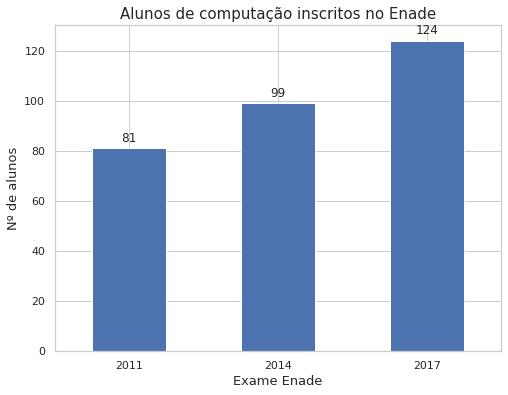

In [27]:
# gráfico de barras mostrando número de alunos de computação de Vitória da Conquista inscritos em cada exame Enade

df = pd.DataFrame({'Exame Enade':['2011', '2014', '2017'], 'Nº de alunos':[insCompVca2011, insCompVca2014, insCompVca2017]})
ax = df.plot.bar(x='Exame Enade', y='Nº de alunos', rot=0, legend=None)

colocar_valor_barras(ax)

plt.title("Alunos de computação inscritos no Enade", fontsize = 15)
plt.ylabel("Nº de alunos", fontsize = 13)
plt.xlabel("Exame Enade",fontsize = 13)
plt.show()


#### **Gráfico de barras - Alunos de computação de VCA faltantes no Enade**

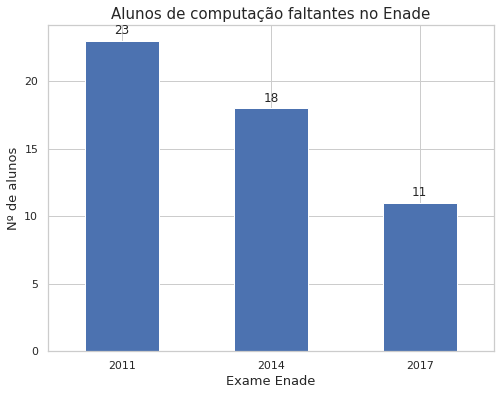

In [28]:
# gráfico de barras mostrando número de alunos de computação de Vitória da Conquista faltantes em cada exame Enade
df = pd.DataFrame({'Exame Enade':['2011', '2014', '2017'], 'Nº de alunos':[insCompVca2011 - presComp2011, insCompVca2014 - presComp2014, insCompVca2017 - presComp2017]})
ax = df.plot.bar(x='Exame Enade', y='Nº de alunos', rot=0, legend=None)

colocar_valor_barras(ax)

plt.title("Alunos de computação faltantes no Enade", fontsize = 15)
plt.ylabel("Nº de alunos", fontsize = 13)
plt.xlabel("Exame Enade",fontsize = 13)
plt.show()

#### **Gráfico de setores - Percentual de alunos por curso de computação de VCA presentes no Enade 2011**

<ipython-input-29-536d00d7d121>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


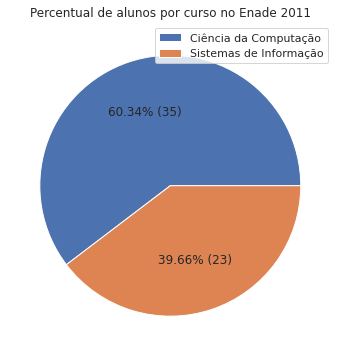

In [29]:
# Percentual de alunos por curso em 2011
agrupado_2011 = df4_2011.groupby(['grupo']).size()
labels = ['Ciência da Computação', 'Sistemas de Informação']

df4_2011.groupby('grupo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(agrupado_2011), labels=None )
plt.legend(labels)
plt.axes().set_ylabel('')
plt.title("Percentual de alunos por curso no Enade 2011")
plt.show()


#### **Gráfico de setores - Percentual de alunos por curso de computação de VCA presentes no Enade 2014**

<ipython-input-30-91d21a68f3e5>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


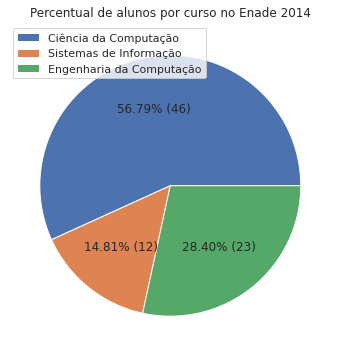

In [30]:
# Percentual de alunos por curso em 2014
agrupado_2014 = df4_2014.groupby(['grupo']).size()
labels = ['Ciência da Computação', 'Sistemas de Informação', 'Engenharia da Computação']

df4_2014.groupby('grupo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(agrupado_2014), labels=None )
plt.legend(labels, loc='upper left')
plt.axes().set_ylabel('')
plt.title("Percentual de alunos por curso no Enade 2014")
plt.show()


#### **Gráfico de setores - Percentual de alunos por curso de computação de VCA presentes no Enade 2017**

<ipython-input-31-35b2e4dc913a>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


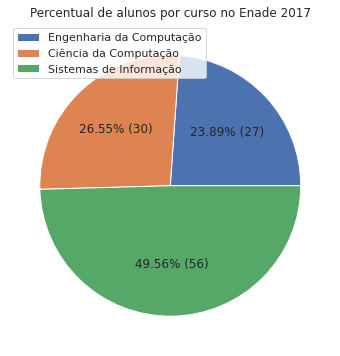

In [31]:
# Percentual de alunos por curso em 2017
agrupado_2017 = df4_2017.groupby(['grupo']).size()
labels = ['Engenharia da Computação', 'Ciência da Computação', 'Sistemas de Informação']

df4_2017.groupby('grupo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(agrupado_2017), labels=None )
plt.legend(labels, loc='upper left')
plt.axes().set_ylabel('')
plt.title("Percentual de alunos por curso no Enade 2017")
plt.show()

#### **Gráfico de setores - Percentual de alunos do sexo M e F dos cursos de computação de VCA presentes no Enade 2011**

<ipython-input-32-8a87c08d4f81>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, 'Percentual (%) de alunos do sexo masculino e feminino no Enade 2011')

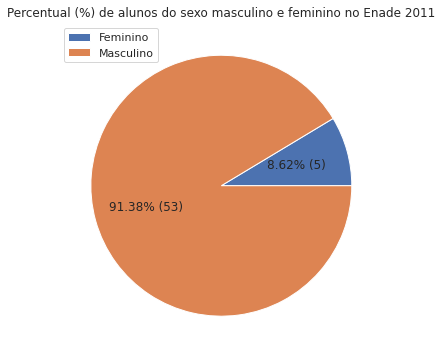

In [32]:
# Percentual de alunos do sexo M e F em 2011
valores2011 = df4_2011['sexo'].value_counts(dropna=True)
labels = ['Feminino', 'Masculino' ]

df4_2011.groupby('sexo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(valores2011), labels=None)
plt.legend(labels, loc='upper left')
plt.axes().set_ylabel('')
plt.title("Percentual (%) de alunos do sexo masculino e feminino no Enade 2011")

#### **Gráfico de setores - Percentual de alunos do sexo M e F dos cursos de computação de VCA presentes no Enade 2014**

<ipython-input-33-cbe89918cc80>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, 'Percentual (%) de alunos do sexo masculino e feminino no Enade 2014')

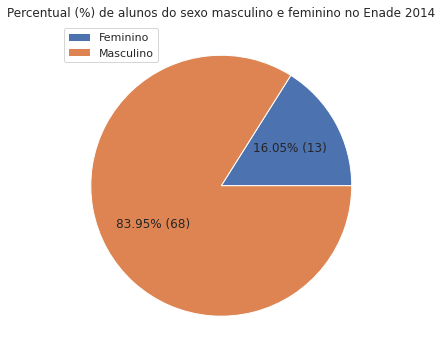

In [33]:
# Percentual de alunos do sexo M e F em 2014
valores2014 = df4_2014['sexo'].value_counts(dropna=True)
labels = ['Feminino', 'Masculino' ]

df4_2014.groupby('sexo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(valores2014), labels=None)
plt.legend(labels, loc='upper left')
plt.axes().set_ylabel('')
plt.title("Percentual (%) de alunos do sexo masculino e feminino no Enade 2014")

#### **Gráfico de setores - Percentual de alunos do sexo M e F dos cursos de computação de VCA presentes no Enade 2017**

<ipython-input-34-86b87c99008e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, 'Percentual (%) de alunos do sexo masculino e feminino no Enade 2017')

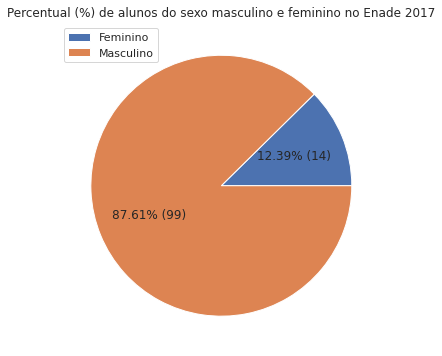

In [34]:
# Percentual de alunos do sexo M e F em 2017
valores2017 = df4_2017['sexo'].value_counts(dropna=True)
labels = ['Feminino', 'Masculino' ]

df4_2017.groupby('sexo').size().plot(kind='pie',autopct=colocar_valor_porcentagem(valores2017), labels=None)
plt.legend(labels, loc='upper left')
plt.axes().set_ylabel('')
plt.title("Percentual (%) de alunos do sexo masculino e feminino no Enade 2017")

#### **Box plot - Distribuição das idades dos concluintes dos cursos de computação de VCA**

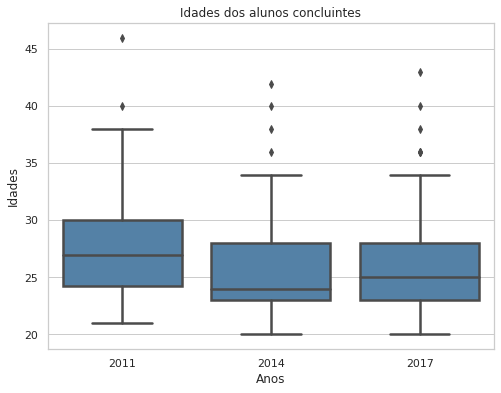

In [35]:
# Idade dos concluintes
idade2011 = pd.DataFrame(df4_2011['idade']).assign(Anos=2011)
idade2014 = pd.DataFrame(df4_2014['idade']).assign(Anos=2014)
idade2017 = pd.DataFrame(df4_2017['idade']).assign(Anos=2017)

cdf = pd.concat([idade2011, idade2014, idade2017])    
mdf = pd.melt(cdf, id_vars=['Anos'], var_name=['Coluna'])

ax = sns.boxplot(x="Anos", y="value", data=mdf,linewidth=2.5, color='steelblue')
plt.legend([],[], frameon=False)
plt.title("Idades dos alunos concluintes")
plt.ylabel("Idades")
plt.show()

In [36]:
idade2011.describe()

,idade,Anos
count,58.000000,58.0
mean,27.741379,2011.0
std,4.685028,0.0
min,21.000000,2011.0
25%,24.250000,2011.0
50%,27.000000,2011.0
75%,30.000000,2011.0
max,46.000000,2011.0


#### **Box plot - Notas na formação geral dos concluintes dos cursos de computação de VCA**

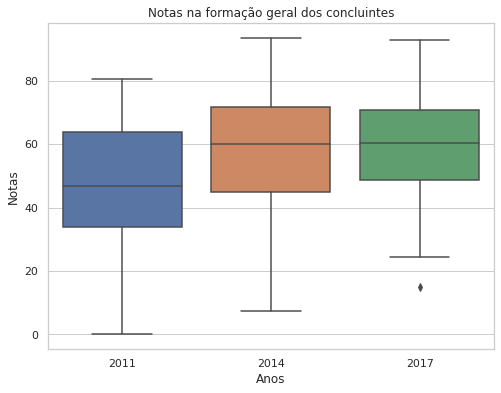

In [37]:
# Notas na formação geral dos alunos concluintes
nota_fg2011 = pd.DataFrame(df4_2011['nota_formacao_geral']).assign(Anos=2011)
nota_fg2014 = pd.DataFrame(df4_2014['nota_formacao_geral']).assign(Anos=2014)
nota_fg2017 = pd.DataFrame(df4_2017['nota_formacao_geral']).assign(Anos=2017)

substituir_virgula_ponto(nota_fg2017,"nota_formacao_geral")
cdf = pd.concat([nota_fg2011, nota_fg2014, nota_fg2017])

valores_em_float(cdf,"nota_formacao_geral")

sns.boxplot(data=cdf, x='Anos', y='nota_formacao_geral')

plt.title("Notas na formação geral dos concluintes")
plt.ylabel("Notas")
plt.show()

In [38]:
nota_fg2011.describe()

,nota_formacao_geral,Anos
count,58.000000,58.0
mean,47.198276,2011.0
std,21.029207,0.0
min,0.000000,2011.0
25%,34.000000,2011.0
50%,46.750000,2011.0
75%,63.875000,2011.0
max,80.500000,2011.0


#### **Box plot - Notas no componente específico dos concluintes dos cursos de computação de VCA**

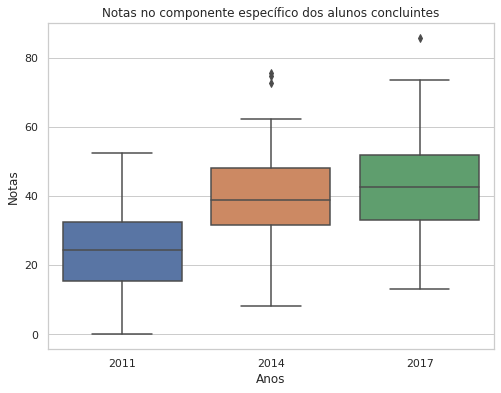

In [39]:
# Notas no componente específico dos alunos concluintes
nota_ce2011 = pd.DataFrame(df4_2011['nota_comp_especifico']).assign(Anos=2011)
nota_ce2014 = pd.DataFrame(df4_2014['nota_comp_especifico']).assign(Anos=2014)
nota_ce2017 = pd.DataFrame(df4_2017['nota_comp_especifico']).assign(Anos=2017)

substituir_virgula_ponto(nota_ce2017,"nota_comp_especifico")

cdf = pd.concat([nota_ce2011, nota_ce2014, nota_ce2017])

valores_em_float(cdf,"nota_comp_especifico")

sns.boxplot(data=cdf, x='Anos', y='nota_comp_especifico')

plt.title("Notas no componente específico dos alunos concluintes")
plt.ylabel("Notas")
plt.show()

In [40]:
nota_ce2014.describe()

,nota_comp_especifico,Anos
count,81.000000,81.0
mean,40.097531,2014.0
std,14.054465,0.0
min,8.100000,2014.0
25%,31.600000,2014.0
50%,38.800000,2014.0
75%,48.000000,2014.0
max,75.600000,2014.0


#### **Box plot - Notas brutas gerais dos concluintes dos cursos de computação de VCA**

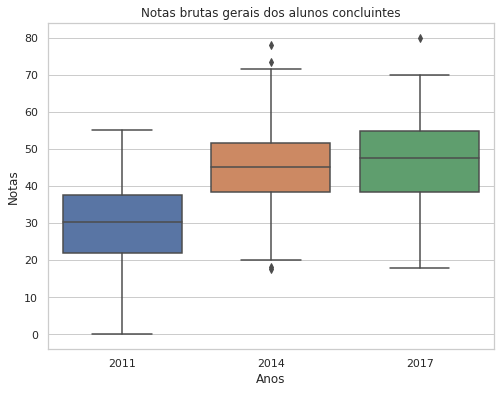

In [41]:
# Notas brutas gerais dos alunos concluintes
nota_bg2011 = pd.DataFrame(df4_2011['nota_bruta_geral']).assign(Anos=2011)
nota_bg2014 = pd.DataFrame(df4_2014['nota_bruta_geral']).assign(Anos=2014)
nota_bg2017 = pd.DataFrame(df4_2017['nota_bruta_geral']).assign(Anos=2017)

substituir_virgula_ponto(nota_bg2017,"nota_bruta_geral")

cdf = pd.concat([nota_bg2011, nota_bg2014, nota_bg2017])

valores_em_float(cdf,"nota_bruta_geral")

sns.boxplot(data=cdf, x='Anos', y='nota_bruta_geral')

plt.title("Notas brutas gerais dos alunos concluintes")
plt.ylabel("Notas")
plt.show()

In [42]:
nota_bg2014.median()

nota_bruta_geral      45.2
Anos                2014.0
dtype: float64

#### **Box plot - Desempenho dos participantes por sexo (Notas no componente específico)**

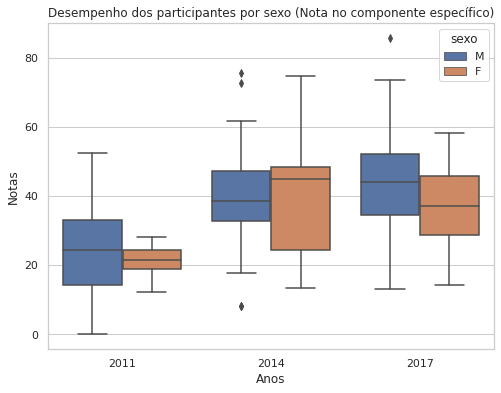

In [43]:
# Desempenho dos participantes por sexo (Nota no componente especifico)
nota_ce_sexo2011 = pd.DataFrame(df4_2011[['nota_comp_especifico', 'sexo']]).assign(Anos=2011)
nota_ce_sexo2014 = pd.DataFrame(df4_2014[['nota_comp_especifico', 'sexo']]).assign(Anos=2014)
nota_ce_sexo2017 = pd.DataFrame(df4_2017[['nota_comp_especifico', 'sexo']]).assign(Anos=2017)

substituir_virgula_ponto(nota_ce_sexo2017,"nota_comp_especifico")

cdf = pd.concat([nota_ce_sexo2011, nota_ce_sexo2014, nota_ce_sexo2017])

valores_em_float(cdf,"nota_comp_especifico")

sns.boxplot(data=cdf, x='Anos', y='nota_comp_especifico', hue='sexo')

plt.title("Desempenho dos participantes por sexo (Nota no componente específico)")
plt.ylabel("Notas")
plt.show()

#### **Box plot - Desempenho dos participantes por sexo (Notas na formação geral)**

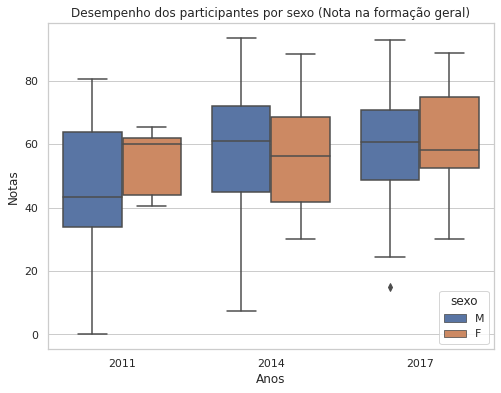

In [44]:
# Desempenho dos participantes por sexo (Nota na formação geral)
nota_fg_sexo2011 = pd.DataFrame(df4_2011[['nota_formacao_geral', 'sexo']]).assign(Anos=2011)
nota_fg_sexo2014 = pd.DataFrame(df4_2014[['nota_formacao_geral', 'sexo']]).assign(Anos=2014)
nota_fg_sexo2017 = pd.DataFrame(df4_2017[['nota_formacao_geral', 'sexo']]).assign(Anos=2017)

substituir_virgula_ponto(nota_fg_sexo2017,"nota_formacao_geral")

cdf = pd.concat([nota_fg_sexo2011, nota_fg_sexo2014, nota_fg_sexo2017])

valores_em_float(cdf,"nota_formacao_geral")

sns.boxplot(data=cdf, x='Anos', y='nota_formacao_geral', hue='sexo')

plt.title("Desempenho dos participantes por sexo (Nota na formação geral)")
plt.ylabel("Notas")
plt.show()

#### **Box plot - Desempenho dos participantes por sexo (Notas brutas gerais)**

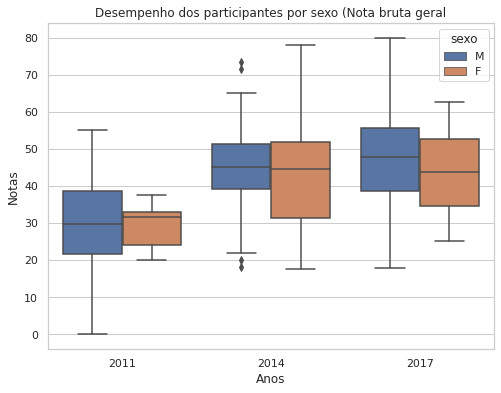

In [45]:
# Desempenho dos participantes por sexo (Nota bruta geral)
nota_bg_sexo2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'sexo']]).assign(Anos=2011)
nota_bg_sexo2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'sexo']]).assign(Anos=2014)
nota_bg_sexo2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'sexo']]).assign(Anos=2017)

substituir_virgula_ponto(nota_bg_sexo2017,"nota_bruta_geral")

cdf = pd.concat([nota_bg_sexo2011, nota_bg_sexo2014, nota_bg_sexo2017])

valores_em_float(cdf,"nota_bruta_geral")

sns.boxplot(data=cdf, x='Anos', y='nota_bruta_geral', hue='sexo')

plt.title("Desempenho dos participantes por sexo (Nota bruta geral")
plt.ylabel("Notas")
plt.show()

#### **Box plot - Desempenho dos participantes por curso (Notas no componente específico)**

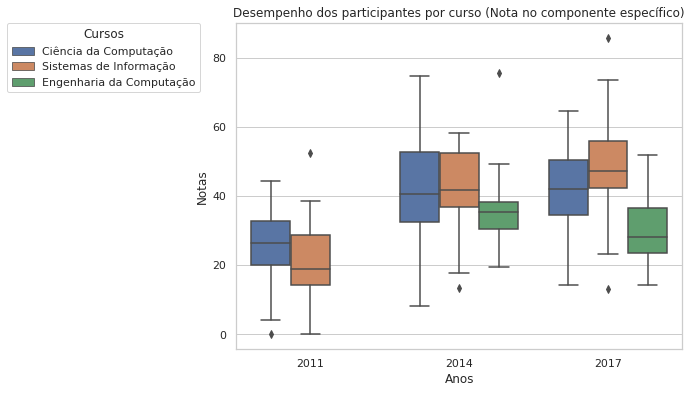

In [46]:
# Desempenho dos participantes por curso (Nota no componente específico)
nota_ce_curso2011 = pd.DataFrame(df_temp2011[['nota_comp_especifico', 'grupo', "nome_cursos"]]).assign(Anos=2011)
nota_ce_curso2014 = pd.DataFrame(df_temp2014[['nota_comp_especifico', 'grupo', "nome_cursos"]]).assign(Anos=2014)
nota_ce_curso2017 = pd.DataFrame(df_temp2017[['nota_comp_especifico', 'grupo', "nome_cursos"]]).assign(Anos=2017)

substituir_virgula_ponto(nota_ce_curso2017,"nota_comp_especifico")

cdf = pd.concat([nota_ce_curso2011, nota_ce_curso2014, nota_ce_curso2017])

valores_em_float(cdf,"nota_comp_especifico")
valores_em_float(nota_ce_curso2017,"nota_comp_especifico")

ax = sns.boxplot(data=cdf, x='Anos', y='nota_comp_especifico', hue='nome_cursos')

legend_label = ["Ciência da Computação","Sistemas de Informação", "Engenharia da Computação"]
ax.legend(title="Cursos", bbox_to_anchor=(-0.08, 1), loc=1, borderaxespad=0.)

legenda_boxplot(legend_label)

plt.title("Desempenho dos participantes por curso (Nota no componente específico)")
plt.ylabel("Notas")

plt.show()

#### **Box plot - Desempenho dos participantes por curso (Notas na formação geral)**

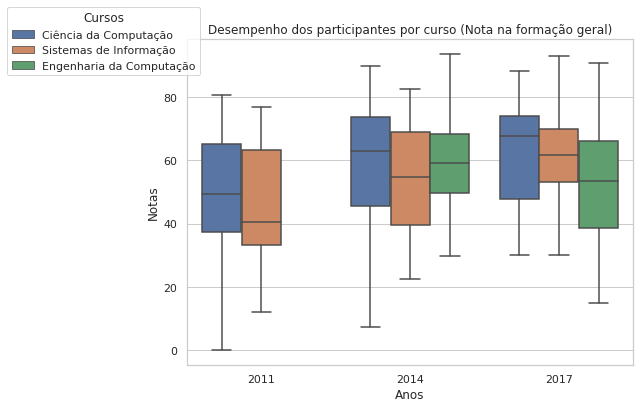

In [47]:
# Desempenho dos participantes por curso (Nota na formação geral)
nota_fg_curso2011 = pd.DataFrame(df_temp2011[['nota_formacao_geral', 'grupo', 'nome_cursos']]).assign(Anos=2011)
nota_fg_curso2014 = pd.DataFrame(df_temp2014[['nota_formacao_geral', 'grupo', 'nome_cursos']]).assign(Anos=2014)
nota_fg_curso2017 = pd.DataFrame(df_temp2017[['nota_formacao_geral', 'grupo', 'nome_cursos']]).assign(Anos=2017)

substituir_virgula_ponto(nota_fg_curso2017,"nota_formacao_geral")

cdf = pd.concat([nota_fg_curso2011, nota_fg_curso2014, nota_fg_curso2017])

valores_em_float(cdf,"nota_formacao_geral")
valores_em_float(nota_fg_curso2017,"nota_formacao_geral")

ax = sns.boxplot(data=cdf, x='Anos', y='nota_formacao_geral', hue='nome_cursos')

legend_label = ["Ciência da Computação","Sistemas de Informação", "Engenharia da Computação"]
ax.legend(title="Cursos", bbox_to_anchor=(0.03, 1.1), loc=1, borderaxespad=0.)

legenda_boxplot(legend_label)

plt.title("Desempenho dos participantes por curso (Nota na formação geral)")
plt.ylabel("Notas")

plt.show()

#### **Box plot - Desempenho dos participantes por curso (Notas brutas gerais)**

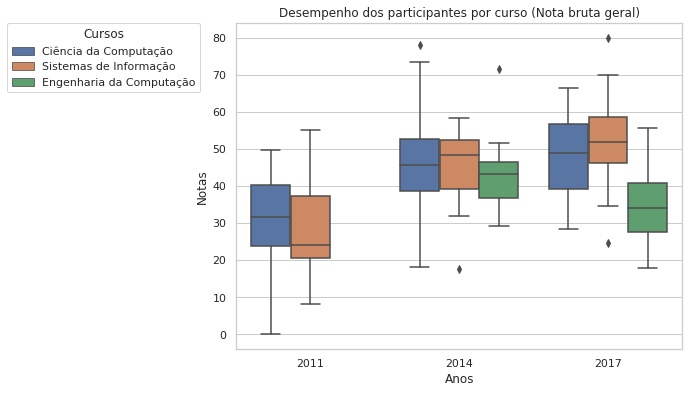

In [48]:
# Desempenho dos participantes por curso (Nota bruta geral)
nota_bg_curso2011 = pd.DataFrame(df_temp2011[['nota_bruta_geral', 'grupo', 'nome_cursos']]).assign(Anos=2011)
nota_bg_curso2014 = pd.DataFrame(df_temp2014[['nota_bruta_geral', 'grupo', 'nome_cursos']]).assign(Anos=2014)
nota_bg_curso2017 = pd.DataFrame(df_temp2017[['nota_bruta_geral', 'grupo', 'nome_cursos']]).assign(Anos=2017)

substituir_virgula_ponto(nota_bg_curso2017,"nota_bruta_geral")

cdf = pd.concat([nota_bg_curso2011, nota_bg_curso2014, nota_bg_curso2017])

valores_em_float(cdf,"nota_bruta_geral")
valores_em_float(nota_bg_curso2017,"nota_bruta_geral")

ax = sns.boxplot(data=cdf, x='Anos', y='nota_bruta_geral', hue='nome_cursos')

legend_label = ["Ciência da Computação","Sistemas de Informação", "Engenharia da Computação"]

ax.legend(title="Cursos", bbox_to_anchor=(-0.08, 1), loc=1, borderaxespad=0.)

legenda_boxplot(legend_label)

plt.title("Desempenho dos participantes por curso (Nota bruta geral)")
plt.ylabel("Notas")

plt.show()

In [49]:
tipoEscola2011 = pd.DataFrame(df3_2011[['qe_i17']])
tipoEscola2014 = pd.DataFrame(df3_2014[['qe_i17']])
tipoEscola2017 = pd.DataFrame(df3_2017[['qe_i17']])

tipoEscola2017.groupby('qe_i17').size()

qe_i17
A    84
B    21
D     9
E     8
dtype: int64

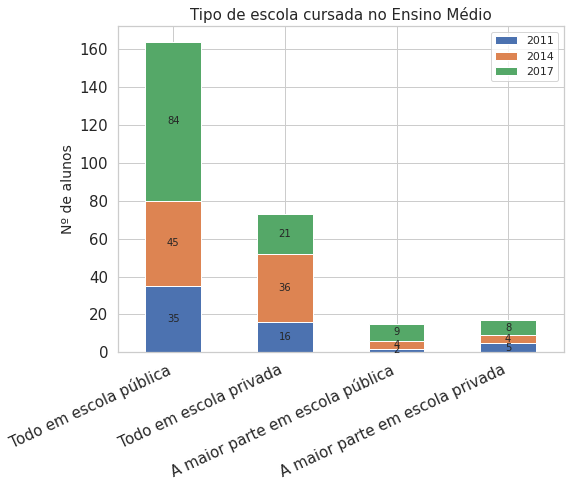

In [50]:
df = pd.DataFrame({'Tipo de Escola':['Todo em escola pública', 'Todo em escola privada', 'A maior parte em escola pública', 
                                     'A maior parte em escola privada'], 
                                     '2011':[35,16,2,5],'2014':[45,36,4,4], '2017':[84,21,9,8]})


ax = df.plot(kind='bar', stacked=True, x = 'Tipo de Escola', fontsize=15)
colocar_valor_barras_emp(ax)
plt.title("Tipo de escola cursada no Ensino Médio", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Nº de alunos", fontsize = 14)

plt.xticks(rotation=25, horizontalalignment="right")
plt.show()

In [51]:
escolaridadePai2011 = pd.DataFrame(df3_2011[['qe_i4']])
escolaridadePai2014 = pd.DataFrame(df3_2014[['qe_i4']])
escolaridadePai2017 = pd.DataFrame(df3_2017[['qe_i4']])

escolaridadePai2017.groupby('qe_i4').size()

qe_i4
A     7
B    28
C    16
D    61
E     8
F     2
dtype: int64

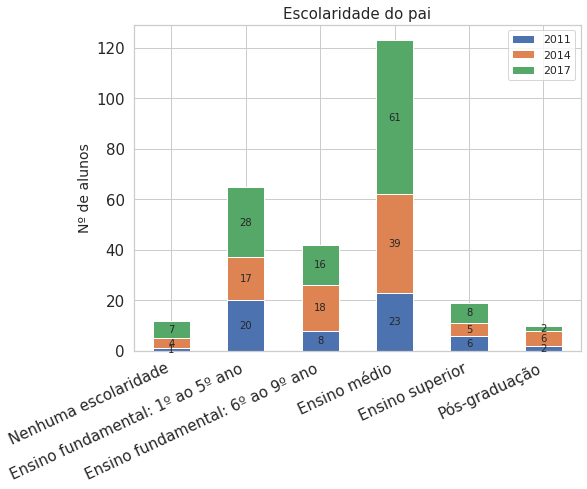

In [52]:
df = pd.DataFrame({'escolaridadePai':['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'], 
                                     '2011':[1,20,8,23,6,2],'2014':[4,17,18,39,5,6], '2017':[7,28,16,61,8,2]})


ax = df.plot(kind='bar', stacked=True, x = 'escolaridadePai', fontsize=15)
colocar_valor_barras_emp(ax)
plt.title("Escolaridade do pai", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Nº de alunos", fontsize = 14)

plt.xticks(rotation=25, horizontalalignment="right")
plt.show()

In [53]:
escolaridadeMae2011 = pd.DataFrame(df3_2011[['qe_i5']])
escolaridadeMae2014 = pd.DataFrame(df3_2014[['qe_i5']])
escolaridadeMae2017 = pd.DataFrame(df3_2017[['qe_i5']])

escolaridadeMae2017.groupby('qe_i5').size()

qe_i5
A     2
B    22
C    12
D    46
E    18
F    22
dtype: int64

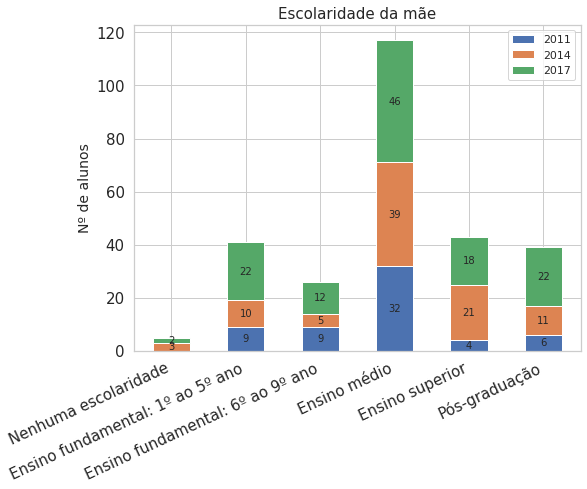

In [54]:
df = pd.DataFrame({'escolaridadeMae':['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'], 
                                     '2011':[0,9,9,32,4,6],'2014':[3,10,5,39,21,11], '2017':[2,22,12,46,18,22]})


ax = df.plot(kind='bar', stacked=True, x = 'escolaridadeMae', fontsize=15)
colocar_valor_barras_emp(ax)
plt.title("Escolaridade da mãe", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Nº de alunos", fontsize = 14)

plt.xticks(rotation=25, horizontalalignment="right")
plt.show()

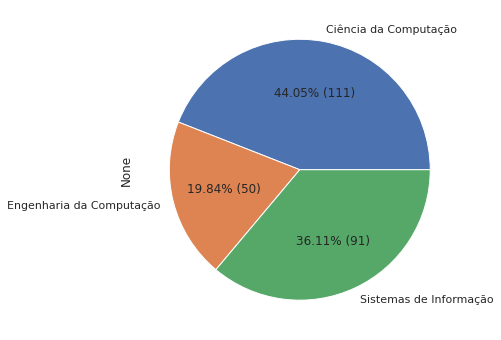

In [55]:
# Distribuição de participantes por curso
curso2011 = pd.DataFrame(df4_2011['nome_cursos']).assign(Anos=2011)
curso2014 = pd.DataFrame(df4_2014['nome_cursos']).assign(Anos=2014)
curso2017 = pd.DataFrame(df4_2017['nome_cursos']).assign(Anos=2017)

cdf = pd.concat([curso2011, curso2014, curso2017])    
mdf = pd.melt(cdf, id_vars=['Anos'], var_name=['Coluna'])
mdf2 = mdf['value'].value_counts(dropna=True)

mdf.groupby('value').size().plot(kind='pie',autopct=colocar_valor_porcentagem(mdf2))

<ipython-input-56-ee22c3e2d2db>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

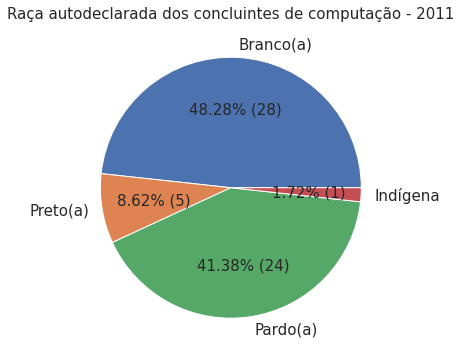

In [56]:
raca2011 = df4_2011['qe_i2'].value_counts(dropna=True)

df4_2011.groupby('qe_i2').size().plot(kind='pie', autopct=colocar_valor_porcentagem(raca2011), labels=["Branco(a)","Preto(a)","Pardo(a)","Indígena"], fontsize = 15)
sns.set(rc={'figure.figsize':(10,9)})
ax.legend(loc=3)

plt.title("Raça autodeclarada dos concluintes de computação - 2011", fontsize = 15)
plt.axes().set_ylabel('')


In [57]:
df4_2011.groupby('qe_i2').size() 

qe_i2
A    28
B     5
C    24
E     1
dtype: int64

<ipython-input-58-9248ee020d5e>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

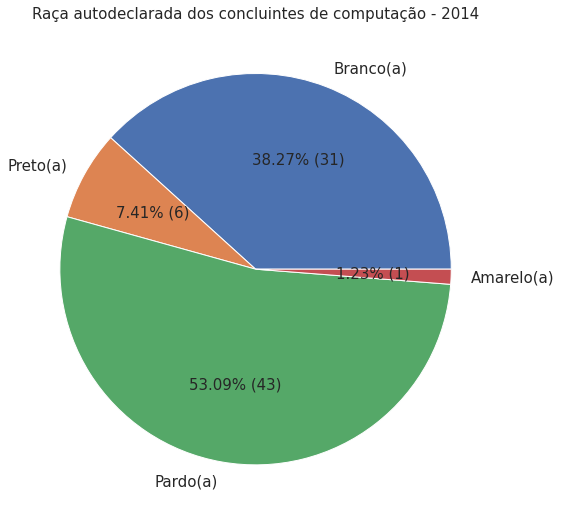

In [58]:
raca2014 = df4_2014['qe_i2'].value_counts(dropna=True)

df4_2014.groupby('qe_i2').size().plot(kind='pie', autopct=colocar_valor_porcentagem(raca2014), labels=["Branco(a)","Preto(a)","Pardo(a)","Amarelo(a)","Indígena"], fontsize=15)
sns.set(rc={'figure.figsize':(10,8)})
ax.legend(loc=3)

plt.title("Raça autodeclarada dos concluintes de computação - 2014", fontsize = 15)
plt.axes().set_ylabel('')


In [59]:
df4_2014.groupby('qe_i2').size() 

qe_i2
a    31
b     6
c    43
d     1
dtype: int64

<ipython-input-60-ec0b821c37b1>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

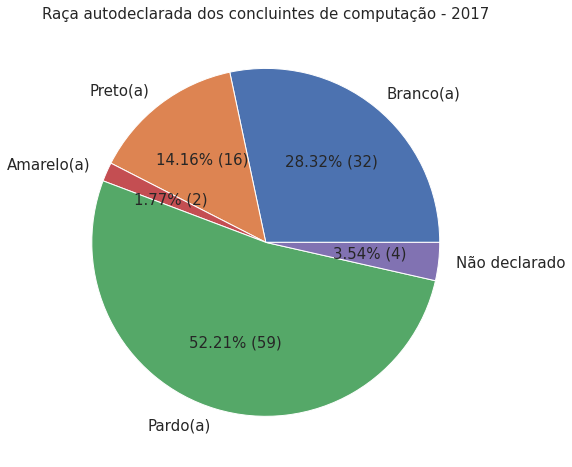

In [60]:
raca2017 = df4_2017['qe_i2'].value_counts(dropna=True)

df4_2017.groupby('qe_i2').size().plot(kind='pie', autopct=colocar_valor_porcentagem(raca2017), 
                                      labels=["Branco(a)","Preto(a)","Amarelo(a)","Pardo(a)","Não declarado"], fontsize=15,
                                      colors=['#4c72b0','#dd8452','#c44e52','#55a868','#8172b2'])
sns.set(rc={'figure.figsize':(10,8)})
ax.legend(loc=3)

plt.title("Raça autodeclarada dos concluintes de computação - 2017", fontsize = 15)
plt.axes().set_ylabel('')

#### **Associação - Notas brutas gerais x horas semanais dedicadas ao estudo**

In [61]:
nota_hora2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'qe_i23']])
nota_hora2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'qe_i23']])
nota_hora2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'qe_i23']])

substituir_virgula_ponto(nota_hora2017,"nota_bruta_geral")
valores_em_float(nota_hora2017,"nota_bruta_geral")

,nota_bruta_geral,qe_i23
102119,47.5,B
102120,41.5,B
102121,63.2,E
102122,56.9,B
102123,60.2,E
...,...,...
439402,54.1,C
439403,59.8,B
439404,53.8,D
439405,55.8,B


#### **Enade 2011**

Text(0, 0.5, 'Média')

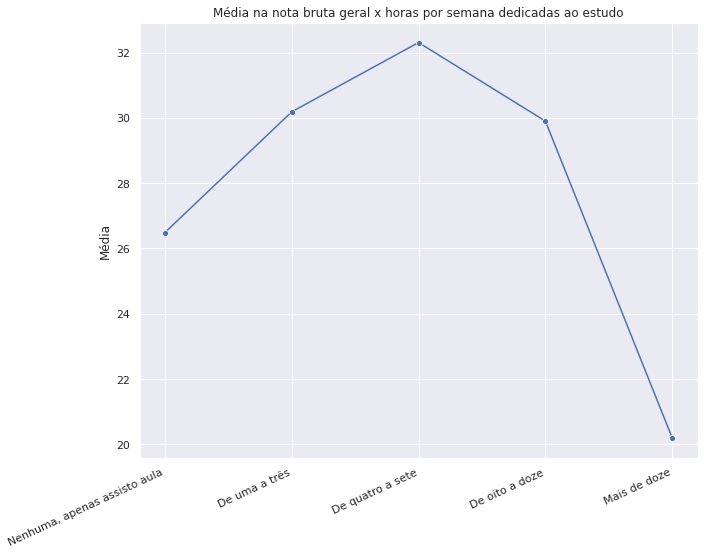

In [62]:
dfhoraA = nota_hora2011[(nota_hora2011["qe_i23"]=='A')]
dfhoraB = nota_hora2011[(nota_hora2011["qe_i23"]=='B')]
dfhoraC = nota_hora2011[(nota_hora2011["qe_i23"]=='C')]
dfhoraD = nota_hora2011[(nota_hora2011["qe_i23"]=='D')]
dfhoraE = nota_hora2011[(nota_hora2011["qe_i23"]=='E')]

mediaNotaA = dfhoraA['nota_bruta_geral'].mean()
mediaNotaB = dfhoraB['nota_bruta_geral'].mean()
mediaNotaC = dfhoraC['nota_bruta_geral'].mean()
mediaNotaD = dfhoraD['nota_bruta_geral'].mean()
mediaNotaE = dfhoraE['nota_bruta_geral'].mean()

notas = [mediaNotaA, mediaNotaB, mediaNotaC, mediaNotaD, mediaNotaE]
horas = ['Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze']

sns.lineplot(y=notas,x=horas, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x horas por semana dedicadas ao estudo")
plt.ylabel("Média")


#### **Enade 2014**

Text(0, 0.5, 'Média')

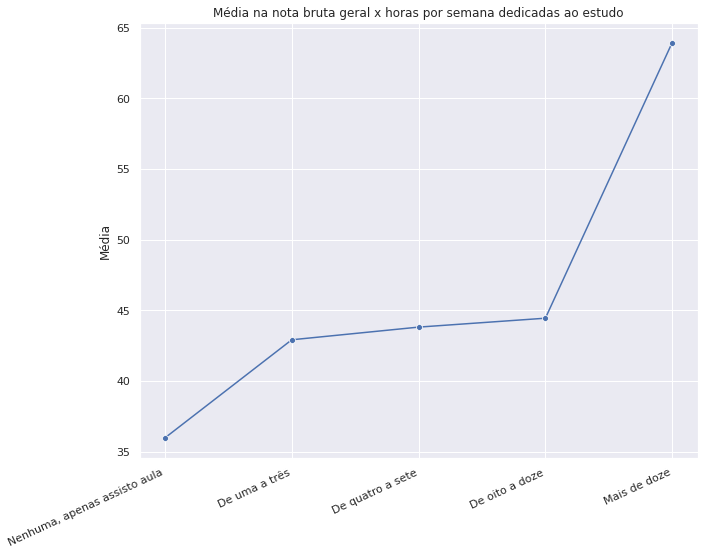

In [63]:
dfhoraA2014 = nota_hora2014[(nota_hora2014["qe_i23"]=='a')]
dfhoraB2014 = nota_hora2014[(nota_hora2014["qe_i23"]=='b')]
dfhoraC2014 = nota_hora2014[(nota_hora2014["qe_i23"]=='c')]
dfhoraD2014 = nota_hora2014[(nota_hora2014["qe_i23"]=='d')]
dfhoraE2014 = nota_hora2014[(nota_hora2014["qe_i23"]=='e')]

mediaNotaA2014 = dfhoraA2014['nota_bruta_geral'].mean()
mediaNotaB2014 = dfhoraB2014['nota_bruta_geral'].mean()
mediaNotaC2014 = dfhoraC2014['nota_bruta_geral'].mean()
mediaNotaD2014 = dfhoraD2014['nota_bruta_geral'].mean()
mediaNotaE2014 = dfhoraE2014['nota_bruta_geral'].mean()

notas2014 = [mediaNotaA2014, mediaNotaB2014, mediaNotaC2014, mediaNotaD2014, mediaNotaE2014]
horas2014 = ['Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze']

sns.lineplot(y=notas2014,x=horas2014, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x horas por semana dedicadas ao estudo")
plt.ylabel("Média")

#### **Enade 2017**

Text(0.5, 0, 'Horas dedicadas')

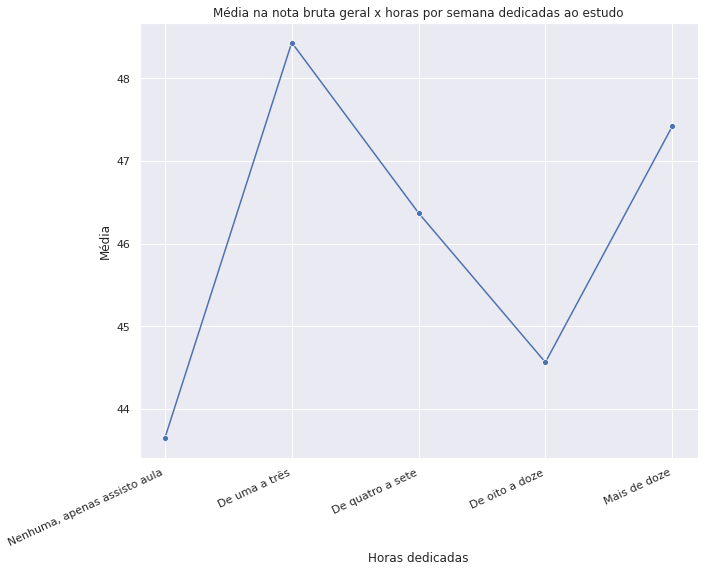

In [64]:
dfhoraA2017 = nota_hora2017[(nota_hora2017["qe_i23"]=='A')]
dfhoraB2017 = nota_hora2017[(nota_hora2017["qe_i23"]=='B')]
dfhoraC2017 = nota_hora2017[(nota_hora2017["qe_i23"]=='C')]
dfhoraD2017 = nota_hora2017[(nota_hora2017["qe_i23"]=='D')]
dfhoraE2017 = nota_hora2017[(nota_hora2017["qe_i23"]=='E')]

mediaNotaA2017 = dfhoraA2017['nota_bruta_geral'].mean()
mediaNotaB2017 = dfhoraB2017['nota_bruta_geral'].mean()
mediaNotaC2017 = dfhoraC2017['nota_bruta_geral'].mean()
mediaNotaD2017 = dfhoraD2017['nota_bruta_geral'].mean()
mediaNotaE2017 = dfhoraE2017['nota_bruta_geral'].mean()

notas2017 = [mediaNotaA2017, mediaNotaB2017, mediaNotaC2017, mediaNotaD2017, mediaNotaE2017]
horas2017 = ['Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze']

sns.lineplot(y=notas2017,x=horas2017, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x horas por semana dedicadas ao estudo")
plt.ylabel("Média")
plt.xlabel("Horas dedicadas")

#### **Enade 2011, 2014 e 2017 juntos**

Text(0, 0.5, 'Média')

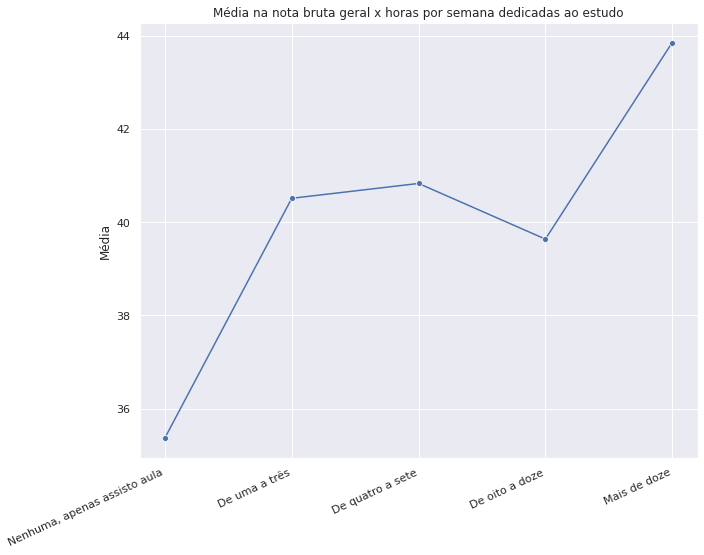

In [65]:
notasTotais = [mediaNotaA, mediaNotaB, mediaNotaC, mediaNotaD, mediaNotaE, mediaNotaA2014, mediaNotaB2014, mediaNotaC2014, mediaNotaD2014, mediaNotaE2014, mediaNotaA2017, mediaNotaB2017, mediaNotaC2017, mediaNotaD2017, mediaNotaE2017]
horasTotais = ['Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze','Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze','Nenhuma, apenas assisto aula','De uma a três','De quatro a sete', 'De oito a doze', 'Mais de doze']

sns.lineplot(y=notasTotais,x=horasTotais, marker="o", ci=None)
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x horas por semana dedicadas ao estudo")
plt.ylabel("Média")

#### **Associação - Notas brutas gerais x tipo de escola cursada no ensino médio**

In [66]:
nota_escola2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'qe_i17']])
nota_escola2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'qe_i17']])
nota_escola2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'qe_i17']])

substituir_virgula_ponto(nota_escola2017,"nota_bruta_geral")
valores_em_float(nota_escola2017,"nota_bruta_geral")

,nota_bruta_geral,qe_i17
102119,47.5,E
102120,41.5,A
102121,63.2,A
102122,56.9,A
102123,60.2,A
...,...,...
439402,54.1,A
439403,59.8,A
439404,53.8,A
439405,55.8,A


#### **Enade 2011**

Text(0, 0.5, 'Média')

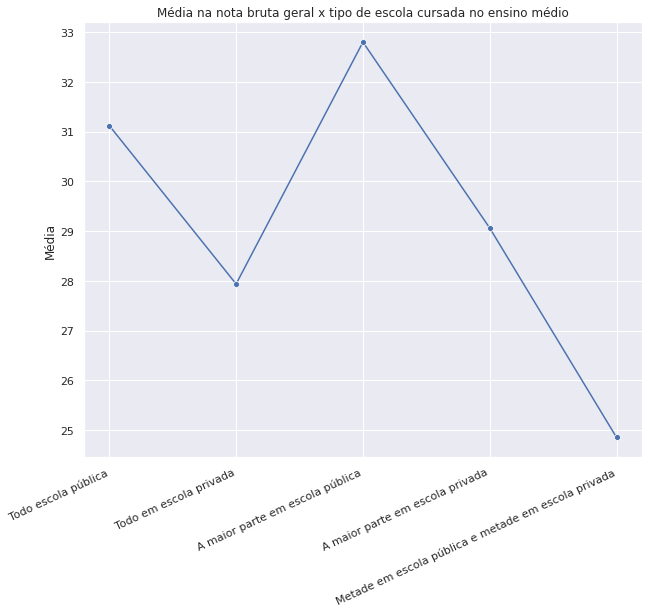

In [67]:
dfEscolaA2011 = nota_escola2011[(nota_escola2011["qe_i17"]=='A')]
dfEscolaB2011 = nota_escola2011[(nota_escola2011["qe_i17"]=='B')]
dfEscolaC2011 = nota_escola2011[(nota_escola2011["qe_i17"]=='C')]
dfEscolaD2011 = nota_escola2011[(nota_escola2011["qe_i17"]=='D')]
dfEscolaE2011 = nota_escola2011[(nota_escola2011["qe_i17"]=='E')]

mediaEscolaA2011 = dfEscolaA2011['nota_bruta_geral'].mean()
mediaEscolaB2011 = dfEscolaB2011['nota_bruta_geral'].mean()
mediaEscolaC2011 = dfEscolaC2011['nota_bruta_geral'].mean()
mediaEscolaD2011 = dfEscolaD2011['nota_bruta_geral'].mean()
mediaEscolaE2011 = dfEscolaE2011['nota_bruta_geral'].mean()

medias = [mediaEscolaA2011, mediaEscolaB2011, mediaEscolaC2011, mediaEscolaD2011, mediaEscolaE2011]
horas = ['Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada', 'Metade em escola pública e metade em escola privada']

sns.lineplot(y=medias,x=horas, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x tipo de escola cursada no ensino médio")
plt.ylabel("Média")

#### **Enade 2014**

Text(0, 0.5, 'Média')

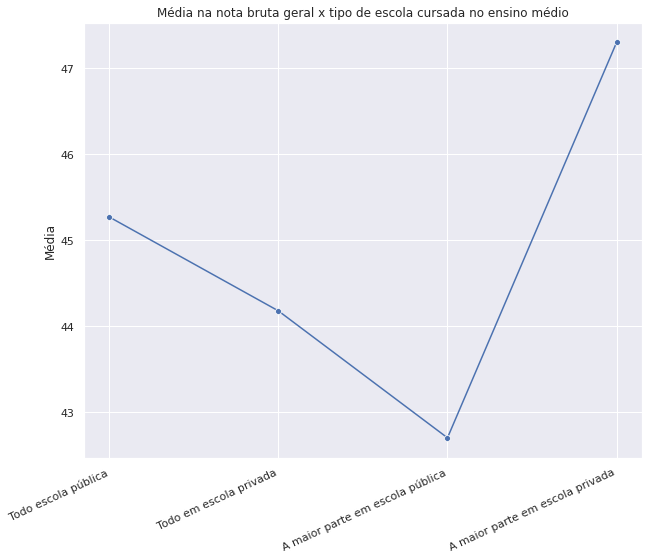

In [68]:
dfEscolaA2014 = nota_escola2014[(nota_escola2014["qe_i17"]=='a')]
dfEscolaB2014 = nota_escola2014[(nota_escola2014["qe_i17"]=='b')]
dfEscolaD2014 = nota_escola2014[(nota_escola2014["qe_i17"]=='d')]
dfEscolaE2014 = nota_escola2014[(nota_escola2014["qe_i17"]=='e')]

mediaEscolaA2014 = dfEscolaA2014['nota_bruta_geral'].mean()
mediaEscolaB2014 = dfEscolaB2014['nota_bruta_geral'].mean()
mediaEscolaD2014 = dfEscolaD2014['nota_bruta_geral'].mean()
mediaEscolaE2014 = dfEscolaE2014['nota_bruta_geral'].mean()

medias = [mediaEscolaA2014, mediaEscolaB2014, mediaEscolaD2014, mediaEscolaE2014]
horas = ['Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada']

sns.lineplot(y=medias,x=horas, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x tipo de escola cursada no ensino médio")
plt.ylabel("Média")

#### **Enade 2017**

Text(0, 0.5, 'Média')

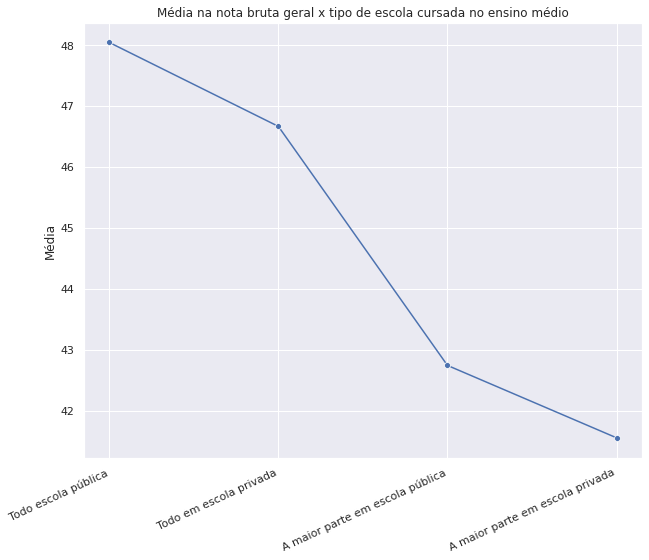

In [69]:
dfEscolaA2017 = nota_escola2017[(nota_escola2017["qe_i17"]=='A')]
dfEscolaB2017 = nota_escola2017[(nota_escola2017["qe_i17"]=='B')]
dfEscolaD2017 = nota_escola2017[(nota_escola2017["qe_i17"]=='D')]
dfEscolaE2017 = nota_escola2017[(nota_escola2017["qe_i17"]=='E')]

mediaEscolaA2017 = dfEscolaA2017['nota_bruta_geral'].mean()
mediaEscolaB2017 = dfEscolaB2017['nota_bruta_geral'].mean()
mediaEscolaD2017 = dfEscolaD2017['nota_bruta_geral'].mean()
mediaEscolaE2017 = dfEscolaE2017['nota_bruta_geral'].mean()

medias = [mediaEscolaA2017, mediaEscolaB2017, mediaEscolaD2017, mediaEscolaE2017]
horas = ['Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada']

sns.lineplot(y=medias,x=horas, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x tipo de escola cursada no ensino médio")
plt.ylabel("Média")

#### **Enade 2011, 2014 e 2017 juntos**

Text(0, 0.5, 'Média')

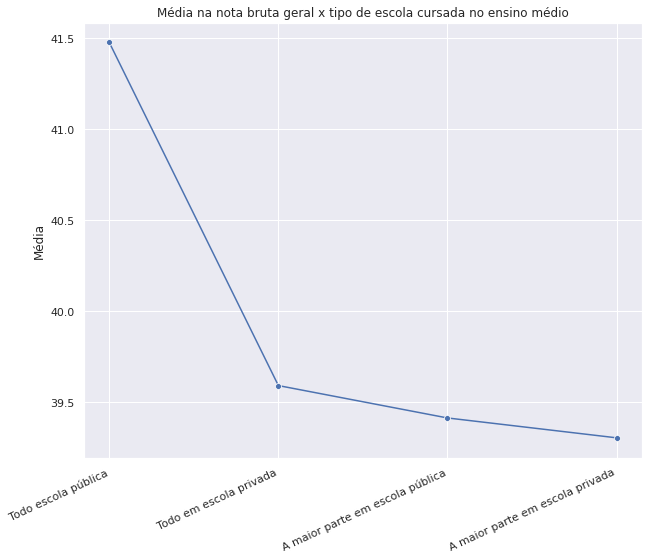

In [70]:
notasTotaisEscola = [mediaEscolaA2011, mediaEscolaB2011, mediaEscolaC2011, mediaEscolaD2011, mediaEscolaA2014, mediaEscolaB2014, mediaEscolaD2014, mediaEscolaE2014, mediaEscolaA2017, mediaEscolaB2017, mediaEscolaD2017, mediaEscolaE2017]
escolaTotais = ['Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada', 'Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada', 'Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada' ]

sns.lineplot(y=notasTotaisEscola,x=escolaTotais, marker="o", ci=None)
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x tipo de escola cursada no ensino médio")
plt.ylabel("Média")

In [71]:
mediaGeralA = (mediaEscolaA2011 + mediaEscolaA2014 + mediaEscolaA2017) / 3
mediaGeralB = (mediaEscolaB2011 + mediaEscolaB2014 + mediaEscolaB2017) / 3
mediaGeralC = (mediaEscolaC2011 + mediaEscolaD2014 + mediaEscolaD2017) / 3
mediaGeralD = (mediaEscolaD2011 + mediaEscolaE2014 + mediaEscolaE2017) / 3


Text(0, 0.5, 'Média')

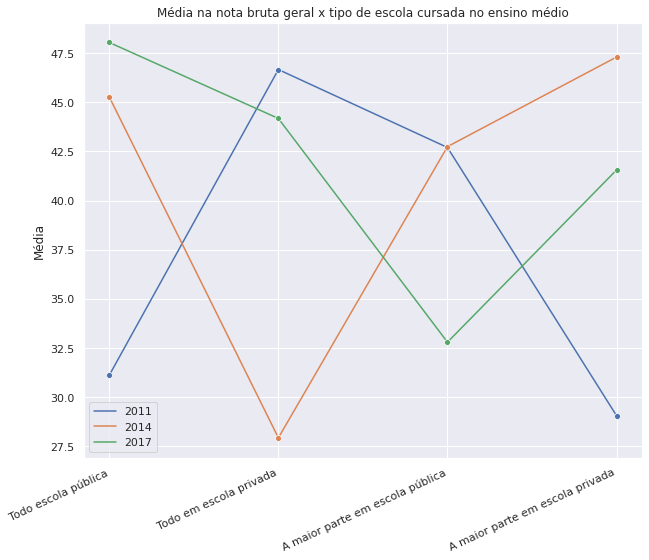

In [72]:
notasTotaisEscolaA = [mediaEscolaA2011, mediaEscolaB2011, mediaEscolaC2011, mediaEscolaD2011, mediaEscolaA2014, mediaEscolaB2014, mediaEscolaD2014, mediaEscolaE2014, mediaEscolaA2017, mediaEscolaB2017, mediaEscolaD2017, mediaEscolaE2017]
escolaTotaisA = ['Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada', 'Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada', 'Todo escola pública','Todo em escola privada','A maior parte em escola pública', 'A maior parte em escola privada' ]
anos = ['2011','2014','2017','2011','2014','2017','2011','2014','2017','2011','2014','2017'] 

sns.lineplot(y=notasTotaisEscolaA,x=escolaTotaisA, marker="o", hue=anos)
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x tipo de escola cursada no ensino médio")
plt.ylabel("Média")

#### **Associação - Notas brutas gerais x escolaridade dos responsáveis**

In [73]:
nota_escolaridade2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'qe_i4', 'qe_i5']])
nota_escolaridade2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'qe_i4', 'qe_i5']])
nota_escolaridade2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'qe_i4', 'qe_i5']])

substituir_virgula_ponto(nota_escolaridade2017,"nota_bruta_geral")
valores_em_float(nota_escolaridade2017,"nota_bruta_geral")

,nota_bruta_geral,qe_i4,qe_i5
102119,47.5,C,B
102120,41.5,C,D
102121,63.2,D,D
102122,56.9,D,D
102123,60.2,B,B
...,...,...,...
439402,54.1,B,B
439403,59.8,B,B
439404,53.8,B,D
439405,55.8,D,D


#### **Enade 2011**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

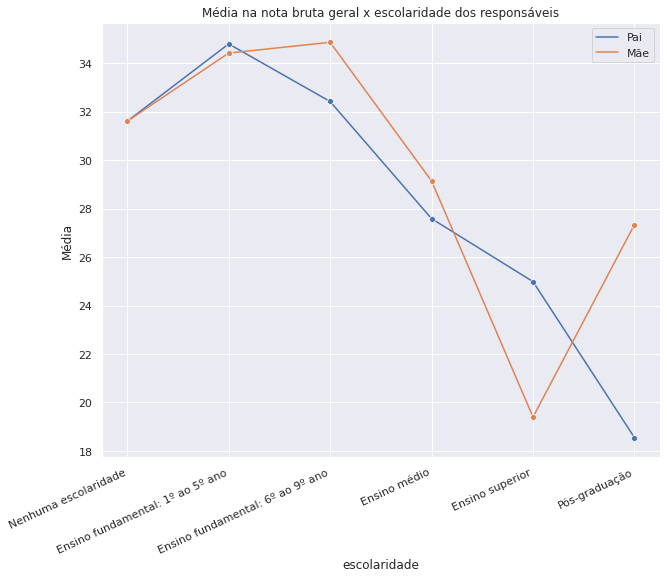

In [74]:
dfEscolaridadePaiA2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='A')]
dfEscolaridadePaiB2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='B')]
dfEscolaridadePaiC2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='C')]
dfEscolaridadePaiD2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='D')]
dfEscolaridadePaiE2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='E')]
dfEscolaridadePaiF2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i4"]=='F')]

mediaEscolaridadePaiA2011 = dfEscolaridadePaiA2011['nota_bruta_geral'].mean()
mediaEscolaridadePaiB2011 = dfEscolaridadePaiB2011['nota_bruta_geral'].mean()
mediaEscolaridadePaiC2011 = dfEscolaridadePaiC2011['nota_bruta_geral'].mean()
mediaEscolaridadePaiD2011 = dfEscolaridadePaiD2011['nota_bruta_geral'].mean()
mediaEscolaridadePaiE2011 = dfEscolaridadePaiE2011['nota_bruta_geral'].mean()
mediaEscolaridadePaiF2011 = dfEscolaridadePaiF2011['nota_bruta_geral'].mean()

dfEscolaridadeMaeA2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='A')]
dfEscolaridadeMaeB2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='B')]
dfEscolaridadeMaeC2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='C')]
dfEscolaridadeMaeD2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='D')]
dfEscolaridadeMaeE2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='E')]
dfEscolaridadeMaeF2011 = nota_escolaridade2011[(nota_escolaridade2011["qe_i5"]=='F')]

mediaEscolaridadeMaeA2011 = mediaEscolaridadePaiA2011
mediaEscolaridadeMaeB2011 = dfEscolaridadeMaeB2011['nota_bruta_geral'].mean()
mediaEscolaridadeMaeC2011 = dfEscolaridadeMaeC2011['nota_bruta_geral'].mean()
mediaEscolaridadeMaeD2011 = dfEscolaridadeMaeD2011['nota_bruta_geral'].mean()
mediaEscolaridadeMaeE2011 = dfEscolaridadeMaeE2011['nota_bruta_geral'].mean()
mediaEscolaridadeMaeF2011 = dfEscolaridadeMaeF2011['nota_bruta_geral'].mean()

df_test = pd.DataFrame({"mediasPaiMae":[mediaEscolaridadePaiA2011, mediaEscolaridadePaiB2011, mediaEscolaridadePaiC2011, mediaEscolaridadePaiD2011, mediaEscolaridadePaiE2011, mediaEscolaridadePaiF2011, mediaEscolaridadeMaeA2011, mediaEscolaridadeMaeB2011, mediaEscolaridadeMaeC2011, mediaEscolaridadeMaeD2011, mediaEscolaridadeMaeE2011, mediaEscolaridadeMaeF2011],
                        "escolaridade": ['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'],
                        "pai_mae":["Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe","Mãe"]})

ax = sns.lineplot("escolaridade", "mediasPaiMae", hue="pai_mae", data=df_test, marker="o")
ax.legend_.set_title(None)

plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x escolaridade dos responsáveis")
plt.ylabel("Média")

#### **Enade 2014**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

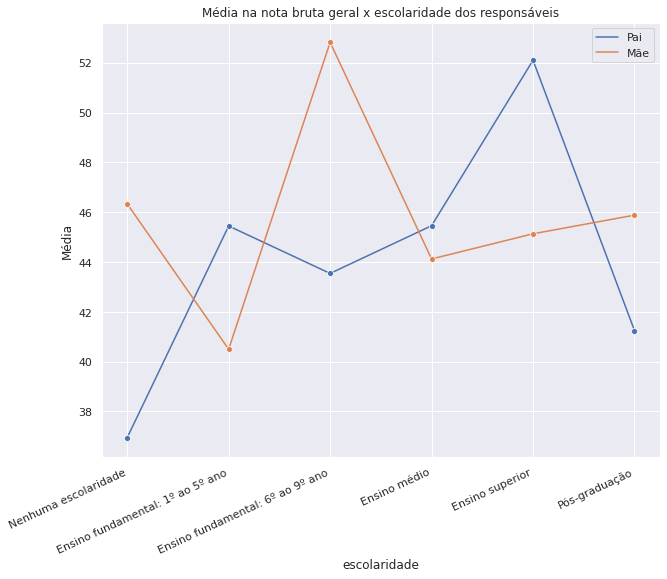

In [75]:
dfEscolaridadePaiA2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='a')]
dfEscolaridadePaiB2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='b')]
dfEscolaridadePaiC2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='c')]
dfEscolaridadePaiD2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='d')]
dfEscolaridadePaiE2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='e')]
dfEscolaridadePaiF2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i4"]=='f')]

mediaEscolaridadePaiA2014 = dfEscolaridadePaiA2014['nota_bruta_geral'].mean()
mediaEscolaridadePaiB2014 = dfEscolaridadePaiB2014['nota_bruta_geral'].mean()
mediaEscolaridadePaiC2014 = dfEscolaridadePaiC2014['nota_bruta_geral'].mean()
mediaEscolaridadePaiD2014 = dfEscolaridadePaiD2014['nota_bruta_geral'].mean()
mediaEscolaridadePaiE2014 = dfEscolaridadePaiE2014['nota_bruta_geral'].mean()
mediaEscolaridadePaiF2014 = dfEscolaridadePaiF2014['nota_bruta_geral'].mean()

dfEscolaridadeMaeA2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='a')]
dfEscolaridadeMaeB2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='b')]
dfEscolaridadeMaeC2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='c')]
dfEscolaridadeMaeD2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='d')]
dfEscolaridadeMaeE2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='e')]
dfEscolaridadeMaeF2014 = nota_escolaridade2014[(nota_escolaridade2014["qe_i5"]=='f')]

mediaEscolaridadeMaeA2014 = dfEscolaridadeMaeA2014['nota_bruta_geral'].mean()
mediaEscolaridadeMaeB2014 = dfEscolaridadeMaeB2014['nota_bruta_geral'].mean()
mediaEscolaridadeMaeC2014 = dfEscolaridadeMaeC2014['nota_bruta_geral'].mean()
mediaEscolaridadeMaeD2014 = dfEscolaridadeMaeD2014['nota_bruta_geral'].mean()
mediaEscolaridadeMaeE2014 = dfEscolaridadeMaeE2014['nota_bruta_geral'].mean()
mediaEscolaridadeMaeF2014 = dfEscolaridadeMaeF2014['nota_bruta_geral'].mean()

df_test2014 = pd.DataFrame({"mediasPaiMae":[mediaEscolaridadePaiA2014, mediaEscolaridadePaiB2014, mediaEscolaridadePaiC2014, mediaEscolaridadePaiD2014, mediaEscolaridadePaiE2014, mediaEscolaridadePaiF2014, mediaEscolaridadeMaeA2014, mediaEscolaridadeMaeB2014, mediaEscolaridadeMaeC2014, mediaEscolaridadeMaeD2014, mediaEscolaridadeMaeE2014, mediaEscolaridadeMaeF2014],
                        "escolaridade": ['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'],
                        "pai_mae":["Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe","Mãe"]})

ax = sns.lineplot("escolaridade", "mediasPaiMae", hue="pai_mae", data=df_test2014, marker="o")
ax.legend_.set_title(None)

plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x escolaridade dos responsáveis")
plt.ylabel("Média")

#### **Enade 2017**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

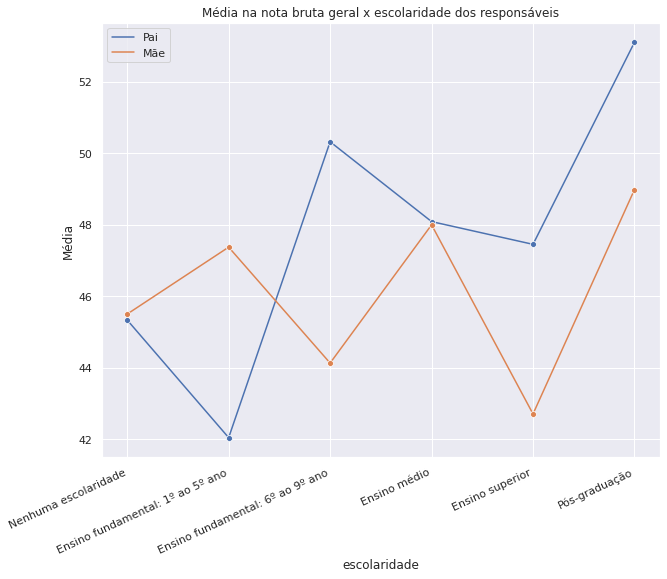

In [76]:
dfEscolaridadePaiA2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='A')]
dfEscolaridadePaiB2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='B')]
dfEscolaridadePaiC2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='C')]
dfEscolaridadePaiD2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='D')]
dfEscolaridadePaiE2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='E')]
dfEscolaridadePaiF2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i4"]=='F')]

mediaEscolaridadePaiA2017 = dfEscolaridadePaiA2017['nota_bruta_geral'].mean()
mediaEscolaridadePaiB2017 = dfEscolaridadePaiB2017['nota_bruta_geral'].mean()
mediaEscolaridadePaiC2017 = dfEscolaridadePaiC2017['nota_bruta_geral'].mean()
mediaEscolaridadePaiD2017 = dfEscolaridadePaiD2017['nota_bruta_geral'].mean()
mediaEscolaridadePaiE2017 = dfEscolaridadePaiE2017['nota_bruta_geral'].mean()
mediaEscolaridadePaiF2017 = dfEscolaridadePaiF2017['nota_bruta_geral'].mean()

dfEscolaridadeMaeA2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='A')]
dfEscolaridadeMaeB2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='B')]
dfEscolaridadeMaeC2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='C')]
dfEscolaridadeMaeD2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='D')]
dfEscolaridadeMaeE2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='E')]
dfEscolaridadeMaeF2017 = nota_escolaridade2017[(nota_escolaridade2017["qe_i5"]=='F')]

mediaEscolaridadeMaeA2017 = dfEscolaridadeMaeA2017['nota_bruta_geral'].mean()
mediaEscolaridadeMaeB2017 = dfEscolaridadeMaeB2017['nota_bruta_geral'].mean()
mediaEscolaridadeMaeC2017 = dfEscolaridadeMaeC2017['nota_bruta_geral'].mean()
mediaEscolaridadeMaeD2017 = dfEscolaridadeMaeD2017['nota_bruta_geral'].mean()
mediaEscolaridadeMaeE2017 = dfEscolaridadeMaeE2017['nota_bruta_geral'].mean()
mediaEscolaridadeMaeF2017 = dfEscolaridadeMaeF2017['nota_bruta_geral'].mean()

df_test2017 = pd.DataFrame({"mediasPaiMae":[mediaEscolaridadePaiA2017, mediaEscolaridadePaiB2017, mediaEscolaridadePaiC2017, mediaEscolaridadePaiD2017, mediaEscolaridadePaiE2017, mediaEscolaridadePaiF2017, mediaEscolaridadeMaeA2017, mediaEscolaridadeMaeB2017, mediaEscolaridadeMaeC2017, mediaEscolaridadeMaeD2017, mediaEscolaridadeMaeE2017, mediaEscolaridadeMaeF2017],
                        "escolaridade": ['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'],
                        "pai_mae":["Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe","Mãe"]})

ax = sns.lineplot("escolaridade", "mediasPaiMae", hue="pai_mae", data=df_test2017, marker="o")
ax.legend_.set_title(None)

plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x escolaridade dos responsáveis")
plt.ylabel("Média")

#### **Enade 2011, 2014 e 2017 juntos**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

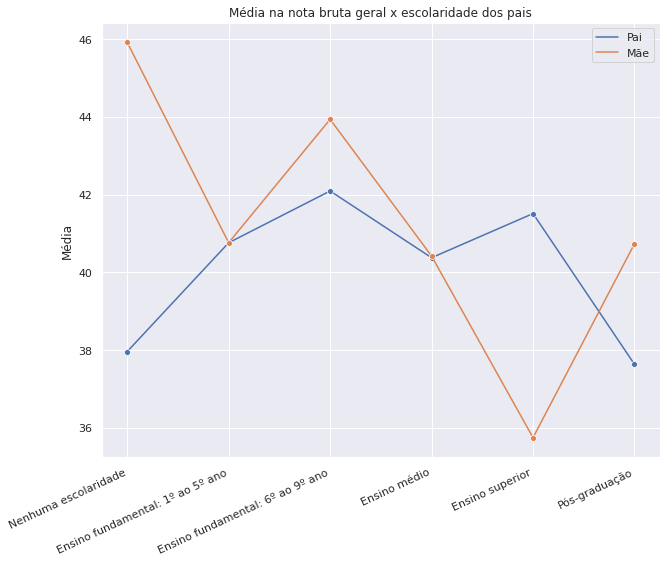

In [77]:
df_testJuntos = pd.DataFrame({"mediasPaiMae":[mediaEscolaridadePaiA2011, mediaEscolaridadePaiB2011, mediaEscolaridadePaiC2011, mediaEscolaridadePaiD2011, mediaEscolaridadePaiE2011, mediaEscolaridadePaiF2011, mediaEscolaridadeMaeB2011, mediaEscolaridadeMaeC2011, mediaEscolaridadeMaeD2011, mediaEscolaridadeMaeE2011, mediaEscolaridadeMaeF2011, mediaEscolaridadePaiA2014, mediaEscolaridadePaiB2014, mediaEscolaridadePaiC2014, mediaEscolaridadePaiD2014, mediaEscolaridadePaiE2014, mediaEscolaridadePaiF2014, mediaEscolaridadeMaeA2014, mediaEscolaridadeMaeB2014, mediaEscolaridadeMaeC2014, mediaEscolaridadeMaeD2014, mediaEscolaridadeMaeE2014, mediaEscolaridadeMaeF2014, mediaEscolaridadePaiA2017, mediaEscolaridadePaiB2017, mediaEscolaridadePaiC2017, mediaEscolaridadePaiD2017, mediaEscolaridadePaiE2017, mediaEscolaridadePaiF2017, mediaEscolaridadeMaeA2017, mediaEscolaridadeMaeB2017, mediaEscolaridadeMaeC2017, mediaEscolaridadeMaeD2017, mediaEscolaridadeMaeE2017, mediaEscolaridadeMaeF2017 ],
                        "escolaridade": ['Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação', 'Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação', 'Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação','Nenhuma escolaridade','Ensino fundamental: 1º ao 5º ano','Ensino fundamental: 6º ao 9º ano', 'Ensino médio', 'Ensino superior', 'Pós-graduação'],
                        "pai_mae":["Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe", "Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe","Mãe", "Pai","Pai","Pai","Pai","Pai","Pai","Mãe","Mãe","Mãe","Mãe","Mãe","Mãe"]})

ax = sns.lineplot("escolaridade", "mediasPaiMae", hue="pai_mae", data=df_testJuntos, marker="o", ci=None)
ax.legend_.set_title(None)

plt.xticks(rotation=25, horizontalalignment="right")
plt.xlabel(None)
plt.title("Média na nota bruta geral x escolaridade dos pais")
plt.ylabel("Média")

#### **Motivo de escolha do curso**

In [78]:
motivoCurso2014 = pd.DataFrame(df4_2014[['qe_i25']])
motivoCurso2017 = pd.DataFrame(df4_2017[['qe_i25']])

motivoCurso2014.groupby('qe_i25').size()

qe_i25
a    12
b     4
c     9
e    38
g     1
h    17
dtype: int64

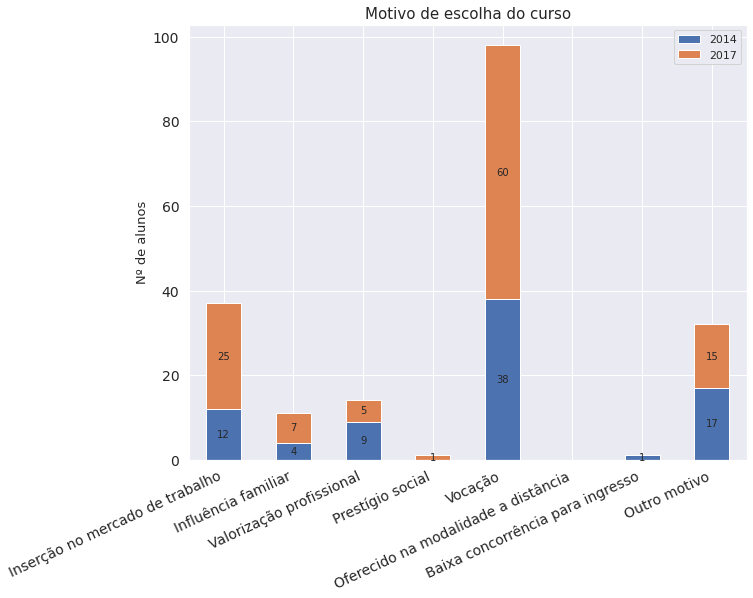

In [79]:
df = pd.DataFrame({'Motivo de escolha do curso':['Inserção no mercado de trabalho', 'Influência familiar', 'Valorização profissional', 'Prestígio social',
                                    'Vocação', 'Oferecido na modalidade a distância', 'Baixa concorrência para ingresso', 'Outro motivo'], 
                                     '2014':[12,4,9,0,38,0,1,17],'2017':[25,7,5,1,60,0,0,15]})


ax = df.plot(kind='bar', stacked=True, x = 'Motivo de escolha do curso', fontsize=14)
colocar_valor_barras_emp(ax)
plt.title("Motivo de escolha do curso", fontsize = 15)
plt.ylabel("Nº de alunos", fontsize = 13)
plt.xlabel(None)
plt.xticks(rotation=25, horizontalalignment="right")

plt.show()

#### **Situação de trabalho**

In [80]:
situacaoTrabalho2011 = pd.DataFrame(df4_2011[['qe_i10']])
situacaoTrabalho2014 = pd.DataFrame(df4_2014[['qe_i10']])
situacaoTrabalho2017 = pd.DataFrame(df4_2017[['qe_i10']])

situacaoTrabalho2017.groupby('qe_i10').size()

qe_i10
A    42
B     7
C     8
D    13
E    43
dtype: int64

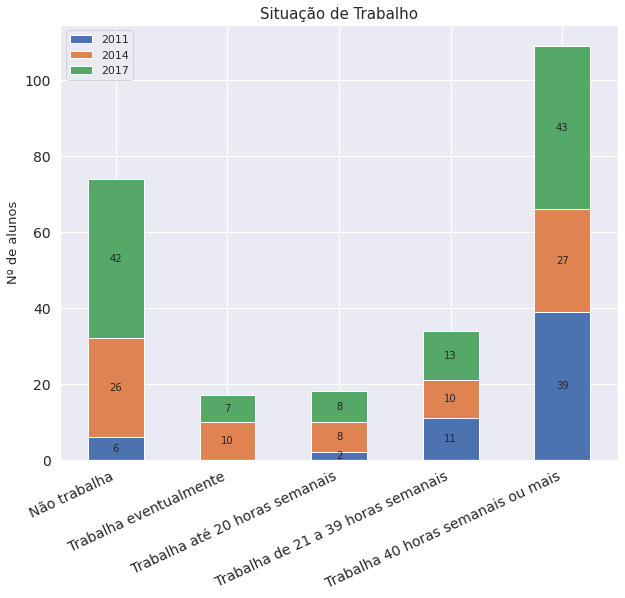

In [81]:
df = pd.DataFrame({'Situação de trabalho':['Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais'], 
                                     '2011':[6,0,2,11,39],'2014':[26,10,8,10,27],'2017':[42,7,8,13,43]})


ax = df.plot(kind='bar', stacked=True, x = 'Situação de trabalho', fontsize=14)
colocar_valor_barras_emp(ax)
plt.title("Situação de Trabalho", fontsize = 15)
plt.ylabel("Nº de alunos", fontsize = 13)
plt.xlabel(None)
plt.xticks(rotation=25, horizontalalignment="right")


plt.show()

In [82]:
situacaoTrabalho2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'qe_i10']])
situacaoTrabalho2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'qe_i10']])
situacaoTrabalho2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'qe_i10']])

substituir_virgula_ponto(situacaoTrabalho2017,"nota_bruta_geral")
valores_em_float(situacaoTrabalho2017,"nota_bruta_geral")

,nota_bruta_geral,qe_i10
102119,47.5,A
102120,41.5,D
102121,63.2,E
102122,56.9,E
102123,60.2,E
...,...,...
439402,54.1,D
439403,59.8,E
439404,53.8,D
439405,55.8,C


#### **Enade 2011**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

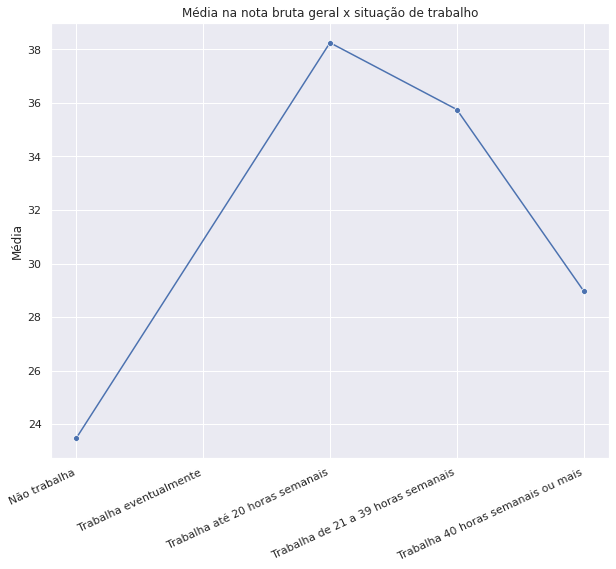

In [83]:
dfTrabalhoA2011 = situacaoTrabalho2011[(situacaoTrabalho2011["qe_i10"]=='A')]
dfTrabalhoB2011 = situacaoTrabalho2011[(situacaoTrabalho2011["qe_i10"]=='B')]
dfTrabalhoC2011 = situacaoTrabalho2011[(situacaoTrabalho2011["qe_i10"]=='C')]
dfTrabalhoD2011 = situacaoTrabalho2011[(situacaoTrabalho2011["qe_i10"]=='D')]
dfTrabalhoE2011 = situacaoTrabalho2011[(situacaoTrabalho2011["qe_i10"]=='E')]

mediaTrabalhoA2011 = dfTrabalhoA2011['nota_bruta_geral'].mean()
mediaTrabalhoB2011 = dfTrabalhoB2011['nota_bruta_geral'].mean()
mediaTrabalhoC2011 = dfTrabalhoC2011['nota_bruta_geral'].mean()
mediaTrabalhoD2011 = dfTrabalhoD2011['nota_bruta_geral'].mean()
mediaTrabalhoE2011 = dfTrabalhoE2011['nota_bruta_geral'].mean()

df_situacao2011 = pd.DataFrame({"mediasTrabalho":[mediaTrabalhoA2011, mediaTrabalhoB2011, mediaTrabalhoC2011, mediaTrabalhoD2011, mediaTrabalhoE2011],
                        "situacao": ['Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais']})

ax = sns.lineplot("situacao", "mediasTrabalho", data=df_situacao2011, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x situação de trabalho")
plt.xlabel(None)
plt.ylabel("Média")

#### **Enade 2014**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

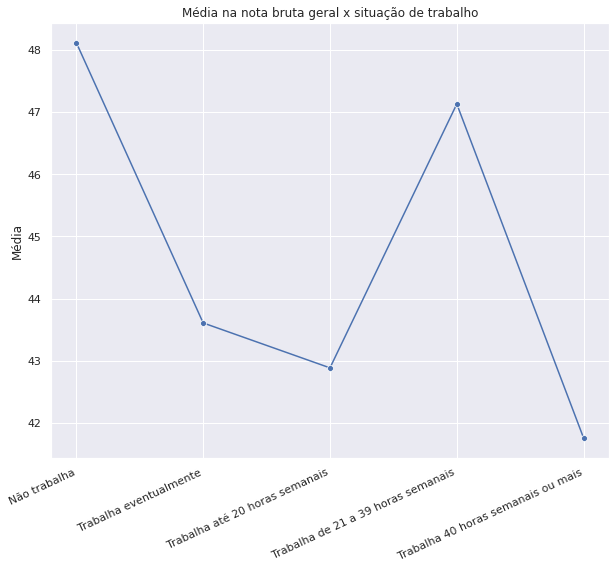

In [84]:
dfTrabalhoA2014 = situacaoTrabalho2014[(situacaoTrabalho2014["qe_i10"]=='a')]
dfTrabalhoB2014 = situacaoTrabalho2014[(situacaoTrabalho2014["qe_i10"]=='b')]
dfTrabalhoC2014 = situacaoTrabalho2014[(situacaoTrabalho2014["qe_i10"]=='c')]
dfTrabalhoD2014 = situacaoTrabalho2014[(situacaoTrabalho2014["qe_i10"]=='d')]
dfTrabalhoE2014 = situacaoTrabalho2014[(situacaoTrabalho2014["qe_i10"]=='e')]

mediaTrabalhoA2014 = dfTrabalhoA2014['nota_bruta_geral'].mean()
mediaTrabalhoB2014 = dfTrabalhoB2014['nota_bruta_geral'].mean()
mediaTrabalhoC2014 = dfTrabalhoC2014['nota_bruta_geral'].mean()
mediaTrabalhoD2014 = dfTrabalhoD2014['nota_bruta_geral'].mean()
mediaTrabalhoE2014 = dfTrabalhoE2014['nota_bruta_geral'].mean()

df_situacao2014 = pd.DataFrame({"mediasTrabalho":[mediaTrabalhoA2014, mediaTrabalhoB2014, mediaTrabalhoC2014, mediaTrabalhoD2014, mediaTrabalhoE2014],
                        "situacao": ['Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais']})

ax = sns.lineplot("situacao", "mediasTrabalho", data=df_situacao2014, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x situação de trabalho")
plt.xlabel(None)
plt.ylabel("Média")

#### **Enade 2017**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

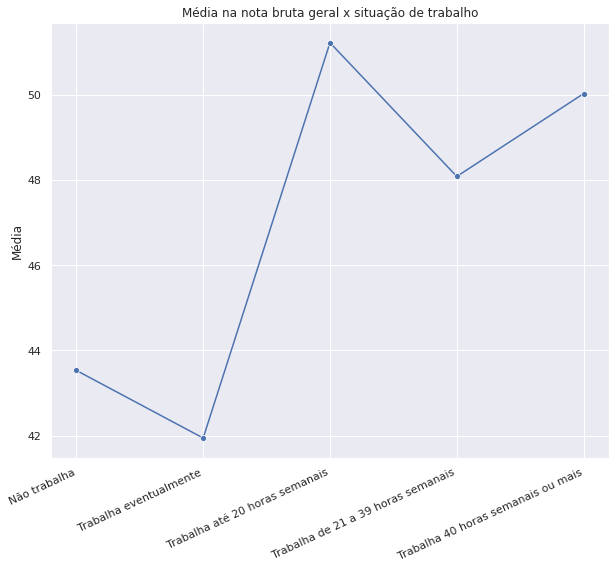

In [85]:
dfTrabalhoA2017 = situacaoTrabalho2017[(situacaoTrabalho2017["qe_i10"]=='A')]
dfTrabalhoB2017 = situacaoTrabalho2017[(situacaoTrabalho2017["qe_i10"]=='B')]
dfTrabalhoC2017 = situacaoTrabalho2017[(situacaoTrabalho2017["qe_i10"]=='C')]
dfTrabalhoD2017 = situacaoTrabalho2017[(situacaoTrabalho2017["qe_i10"]=='D')]
dfTrabalhoE2017 = situacaoTrabalho2017[(situacaoTrabalho2017["qe_i10"]=='E')]

mediaTrabalhoA2017 = dfTrabalhoA2017['nota_bruta_geral'].mean()
mediaTrabalhoB2017 = dfTrabalhoB2017['nota_bruta_geral'].mean()
mediaTrabalhoC2017 = dfTrabalhoC2017['nota_bruta_geral'].mean()
mediaTrabalhoD2017 = dfTrabalhoD2017['nota_bruta_geral'].mean()
mediaTrabalhoE2017 = dfTrabalhoE2017['nota_bruta_geral'].mean()

df_situacao2017 = pd.DataFrame({"mediasTrabalho":[mediaTrabalhoA2017, mediaTrabalhoB2017, mediaTrabalhoC2017, mediaTrabalhoD2017, mediaTrabalhoE2017],
                        "situacao": ['Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais']})

ax = sns.lineplot("situacao", "mediasTrabalho", data=df_situacao2017, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x situação de trabalho")
plt.xlabel(None)
plt.ylabel("Média")

#### **Associação Nota Bruta Geral x Situação de Trabalho**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

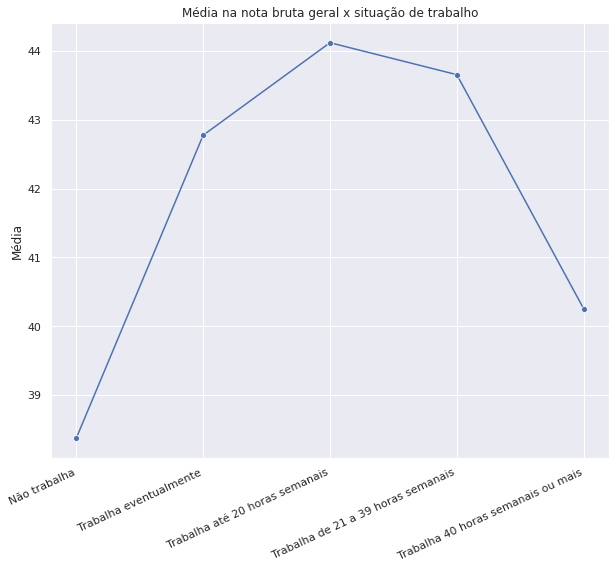

In [87]:
df_situacaoJuntos = pd.DataFrame({"mediasTrabalho":[mediaTrabalhoA2011, mediaTrabalhoB2011, mediaTrabalhoC2011, mediaTrabalhoD2011, mediaTrabalhoE2011, mediaTrabalhoA2014, mediaTrabalhoB2014, mediaTrabalhoC2014, mediaTrabalhoD2014, mediaTrabalhoE2014, mediaTrabalhoA2017, mediaTrabalhoB2017, mediaTrabalhoC2017, mediaTrabalhoD2017, mediaTrabalhoE2017],
                        "situacao": ['Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais', 'Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais', 'Não trabalha', 'Trabalha eventualmente', 'Trabalha até 20 horas semanais', 
                                    'Trabalha de 21 a 39 horas semanais', 'Trabalha 40 horas semanais ou mais']})

ax = sns.lineplot("situacao", "mediasTrabalho", data=df_situacaoJuntos, marker="o", ci=None)
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x situação de trabalho")
plt.xlabel(None)
plt.ylabel("Média")

#### **Renda familiar dos concluintes**

In [ ]:
renda2011 = pd.DataFrame(df4_2011[['qe_i8']])
renda2014 = pd.DataFrame(df4_2014[['qe_i8']])
renda2017 = pd.DataFrame(df4_2017[['qe_i8']])

renda2017.groupby('qe_i8').size()

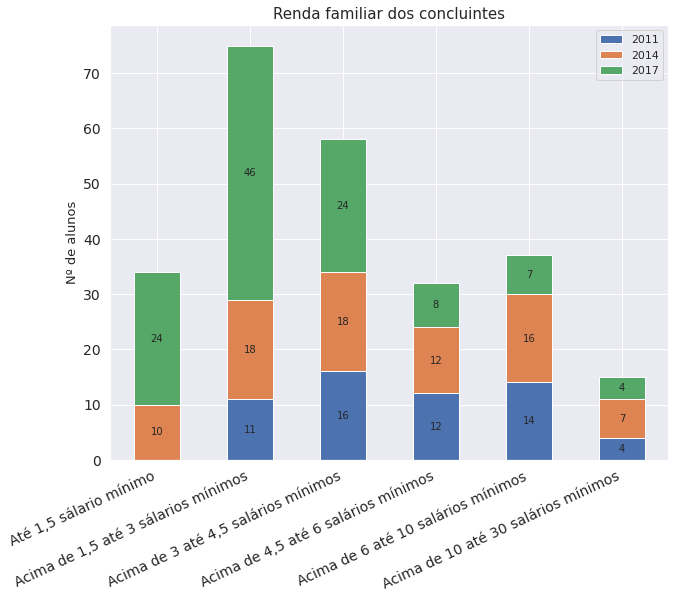

In [89]:
df = pd.DataFrame({'Renda':['Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos'], 
                                     '2011':[0,11,16,12,14,4],'2014':[10,18,18,12,16,7],'2017':[24,46,24,8,7,4]})


ax = df.plot(kind='bar', stacked=True, x = 'Renda', fontsize=14)
colocar_valor_barras_emp(ax)
plt.title("Renda familiar dos concluintes", fontsize = 15)
plt.ylabel("Nº de alunos", fontsize = 13)
plt.xlabel(None)
plt.xticks(rotation=25, horizontalalignment="right")

plt.show()

In [90]:
rendaFamilia2011 = pd.DataFrame(df4_2011[['nota_bruta_geral', 'qe_i8']])
rendaFamilia2014 = pd.DataFrame(df4_2014[['nota_bruta_geral', 'qe_i8']])
rendaFamilia2017 = pd.DataFrame(df4_2017[['nota_bruta_geral', 'qe_i8']])

substituir_virgula_ponto(rendaFamilia2017,"nota_bruta_geral")
valores_em_float(rendaFamilia2017,"nota_bruta_geral")

,nota_bruta_geral,qe_i8
102119,47.5,A
102120,41.5,A
102121,63.2,E
102122,56.9,E
102123,60.2,C
...,...,...
439402,54.1,A
439403,59.8,B
439404,53.8,C
439405,55.8,B


#### **Associação Nota Bruta x Renda Familiar - Enade 2011**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

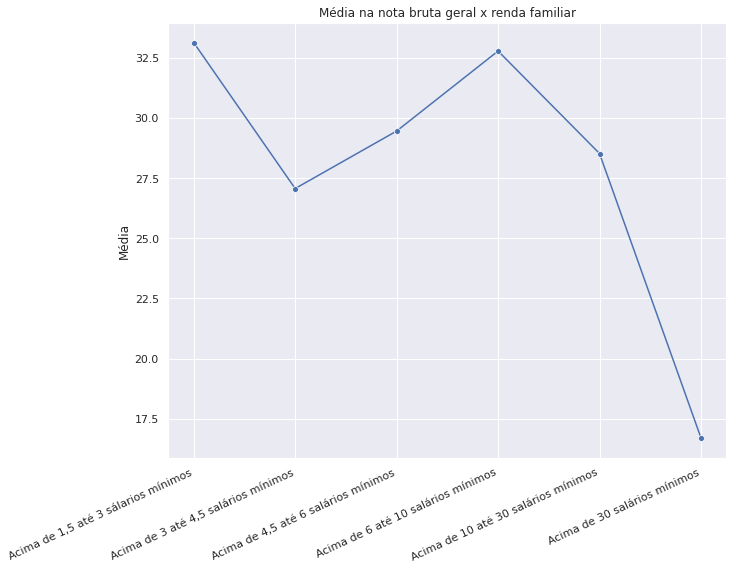

In [91]:
rendaB2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='B')]
rendaC2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='C')]
rendaD2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='D')]
rendaE2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='E')]
rendaF2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='F')]
rendaG2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='G')]
rendaH2011 = rendaFamilia2011[(rendaFamilia2011["qe_i8"]=='H')]

mediaRendaB2011 = rendaB2011['nota_bruta_geral'].mean()
mediaRendaC2011 = rendaC2011['nota_bruta_geral'].mean()
mediaRendaD2011 = rendaD2011['nota_bruta_geral'].mean()
mediaRendaE2011 = rendaE2011['nota_bruta_geral'].mean()
mediaRendaF2011 = rendaF2011['nota_bruta_geral'].mean()
mediaRendaG2011 = rendaG2011['nota_bruta_geral'].mean()
mediaRendaH2011 = rendaH2011['nota_bruta_geral'].mean()

df_renda2011 = pd.DataFrame({"mediasRenda":[mediaRendaB2011, mediaRendaC2011, mediaRendaD2011, mediaRendaE2011, mediaRendaF2011, mediaRendaG2011, mediaRendaH2011],
                        "renda": ['Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos', 'Acima de 30 salários mínimos']})

ax = sns.lineplot("renda", "mediasRenda", data=df_renda2011, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x renda familiar")
plt.xlabel(None)
plt.ylabel("Média")

#### **Associação Nota Bruta x Renda Familiar - Enade 2014**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

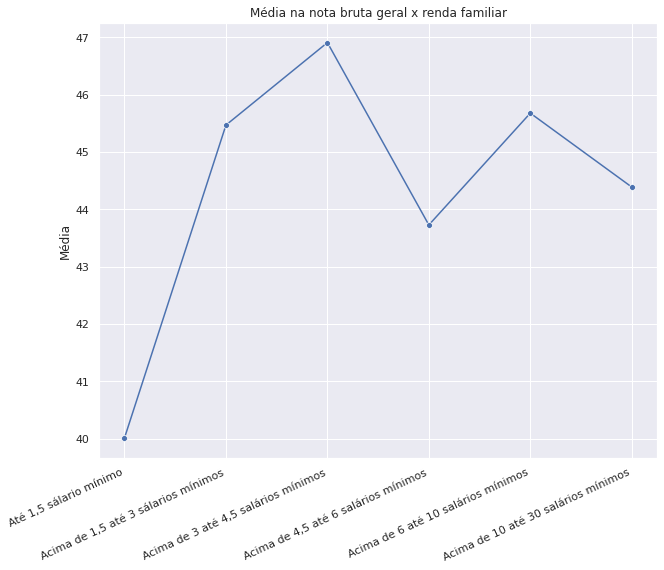

In [92]:
rendaA2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='a')]
rendaB2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='b')]
rendaC2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='c')]
rendaD2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='d')]
rendaE2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='e')]
rendaF2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='f')]
rendaG2014 = rendaFamilia2014[(rendaFamilia2014["qe_i8"]=='g')]

mediaRendaA2014 = rendaA2014['nota_bruta_geral'].mean()
mediaRendaB2014 = rendaB2014['nota_bruta_geral'].mean()
mediaRendaC2014 = rendaC2014['nota_bruta_geral'].mean()
mediaRendaD2014 = rendaD2014['nota_bruta_geral'].mean()
mediaRendaE2014 = rendaE2014['nota_bruta_geral'].mean()
mediaRendaF2014 = rendaF2014['nota_bruta_geral'].mean()
mediaRendaG2014 = rendaG2014['nota_bruta_geral'].mean()


df_renda2014 = pd.DataFrame({"mediasRenda":[mediaRendaA2014, mediaRendaB2014, mediaRendaC2014, mediaRendaD2014, mediaRendaE2014, mediaRendaF2014, mediaRendaG2014],
                        "renda": ['Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos', 'Acima de 30 salários mínimos']})

ax = sns.lineplot("renda", "mediasRenda", data=df_renda2014, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x renda familiar")
plt.xlabel(None)
plt.ylabel("Média")

#### **Associação Nota Bruta x Renda Familiar - Enade 2017**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

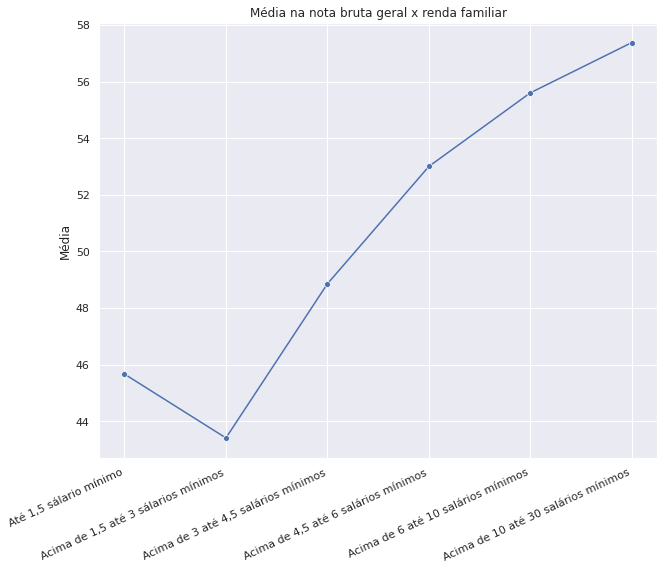

In [93]:
rendaA2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='A')]
rendaB2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='B')]
rendaC2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='C')]
rendaD2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='D')]
rendaE2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='E')]
rendaF2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='F')]
rendaG2017 = rendaFamilia2017[(rendaFamilia2017["qe_i8"]=='G')]

mediaRendaA2017 = rendaA2017['nota_bruta_geral'].mean()
mediaRendaB2017 = rendaB2017['nota_bruta_geral'].mean()
mediaRendaC2017 = rendaC2017['nota_bruta_geral'].mean()
mediaRendaD2017 = rendaD2017['nota_bruta_geral'].mean()
mediaRendaE2017 = rendaE2017['nota_bruta_geral'].mean()
mediaRendaF2017 = rendaF2017['nota_bruta_geral'].mean()
mediaRendaG2017 = rendaG2017['nota_bruta_geral'].mean()


df_renda2017 = pd.DataFrame({"mediasRenda":[mediaRendaA2017, mediaRendaB2017, mediaRendaC2017, mediaRendaD2017, mediaRendaE2017, mediaRendaF2017, mediaRendaG2017],
                        "renda": ['Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos', 'Acima de 30 salários mínimos']})

ax = sns.lineplot("renda", "mediasRenda", data=df_renda2017, marker="o")
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x renda familiar")
plt.xlabel(None)
plt.ylabel("Média")

#### **Associação Nota Bruta x Renda Familiar**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média')

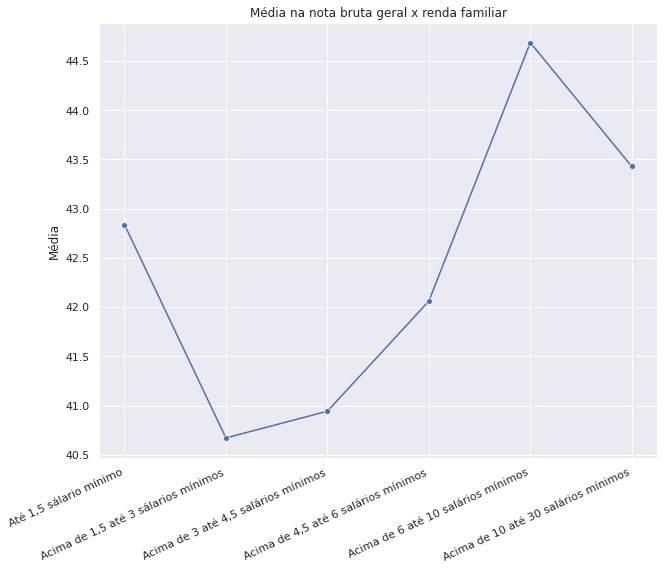

In [94]:
df_rendaTotal = pd.DataFrame({"mediasRenda":[mediaRendaB2011, mediaRendaC2011, mediaRendaD2011, mediaRendaE2011, mediaRendaF2011, mediaRendaG2011, mediaRendaA2014, mediaRendaB2014, mediaRendaC2014, mediaRendaD2014, mediaRendaE2014, mediaRendaF2014, mediaRendaA2017, mediaRendaB2017, mediaRendaC2017, mediaRendaD2017, mediaRendaE2017, mediaRendaF2017],
                        "renda": ['Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos', 'Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos', 'Até 1,5 sálario mínimo', 'Acima de 1,5 até 3 sálarios mínimos', 'Acima de 3 até 4,5 salários mínimos',
                                    'Acima de 4,5 até 6 salários mínimos', 'Acima de 6 até 10 salários mínimos', 'Acima de 10 até 30 salários mínimos']})

ax = sns.lineplot("renda", "mediasRenda", data=df_rendaTotal, marker="o", ci=None)
plt.xticks(rotation=25, horizontalalignment="right")
plt.title("Média na nota bruta geral x renda familiar")
plt.xlabel(None)
plt.ylabel("Média")